In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Análisis de tiempo de extracción por modelo de lenguaje
import seaborn as sns

In [159]:
data_path = "data/formalizacion_data.csv"

data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data_head = data.iloc[0:6]
data_head.style

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
0,BOE-B-2016-1036.pdf,01-2016,AEG Power Solutions Ibérica Sociedad Anónima,302000.000000,euros,Dirección de Abastecimiento y Transportes,Suministro,Ordinaria,Negociado sin publicidad,phi3,234.440000
1,BOE-B-2016-2351.pdf,01-2016,LD Empresa de Limpieza y Desinfección S.A.U.,492471.060000,euros,Departamento de Economía y Conocimiento,Servicios,Ordinaria,Abierto,phi3,669.030000
2,BOE-B-2016-2508.pdf,01-2016,Oms Sacede S.A.U.,6369651.200000,euros,Agencia Catalana del Agua,Servicios,Ordinaria,Abierto,phi3,232.550000
3,BOE-B-2016-859.pdf,01-2016,Oracle Ibérica S.R.L.,217338.970000,euros,Junta de Contratación de la Subsecretaría de Fomento,Servicios,Ordinaria,Negociado sin publicidad,llama3,351.180000
4,BOE-B-2016-1560.pdf,01-2016,U90236837,1452077.100000,euros,Instituto Nacional de la Seguridad Social,Servicios,Ordinaria,Abierto,llama3,386.320000
5,BOE-B-2016-2362.pdf,01-2016,Barna Import Medica S.A. (A-58001686); Covidien Spain S.L. (B-60661089); Medline International Iberia S.L. (B- 86030723),nan,nan,Consejería de Sanidad. Servicio Madrileño de Salud.,Suministros,Ordinaria,Abierto,llama3,423.190000


In [160]:
# Display columns and dimensions of the dataset
print(f"Columns are: {data.columns}")
print(f"Number of rows is: {data.shape[0]} and number of columns is: {data.shape[1]}")

# Average time of extraction by language model and in total
print(data.groupby("model")["time"].mean())
print(data["time"].mean())

Columns are: Index(['pdf', 'mm_yyyy', 'company', 'amount', 'currency', 'adjudicadora',
       'tipo', 'tramitacion', 'procedimiento', 'model', 'time'],
      dtype='object')
Number of rows is: 300 and number of columns is: 11
model
llama3    397.605238
phi3      266.896340
Name: time, dtype: float64
330.9437


Avarage time of data extraction is 325 seconds aprox so 300 files would take 27 hours aprox.

## Data Cleaning and Preparation

In [161]:
# Replace 'None' with NaN
data.replace('None', pd.NA, inplace=True)

# Drop rows where 'amount' is NaN
cleaned_data = data.dropna(subset=['amount'])

# Convert 'amount' and 'time' to numeric
cleaned_data['amount'] = pd.to_numeric(cleaned_data['amount'], errors='coerce')
cleaned_data['time'] = pd.to_numeric(cleaned_data['time'], errors='coerce')

# Convert 'mm_yyyy' to datetime
cleaned_data['mm_yyyy'] = pd.to_datetime(cleaned_data['mm_yyyy'], format='%m-%Y', errors='coerce')

# Checking the cleaned data
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 299
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   pdf            276 non-null    object        
 1   mm_yyyy        276 non-null    datetime64[ns]
 2   company        253 non-null    object        
 3   amount         276 non-null    float64       
 4   currency       276 non-null    object        
 5   adjudicadora   267 non-null    object        
 6   tipo           275 non-null    object        
 7   tramitacion    242 non-null    object        
 8   procedimiento  242 non-null    object        
 9   model          276 non-null    object        
 10  time           276 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 25.9+ KB


/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/159540106.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['amount'] = pd.to_numeric(cleaned_data['amount'], errors='coerce')
/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/159540106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['time'] = pd.to_numeric(cleaned_data['time'], errors='coerce')
/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/159540106.py:12: SettingWithCopyWarni

The data has been cleaned and prepared as follows:

- Missing values represented as 'None' have been replaced with NaN.
- Rows with NaN values in the amount field have been removed.
- amount and time columns have been converted to numeric.
- mm_yyyy has been converted to a datetime format.

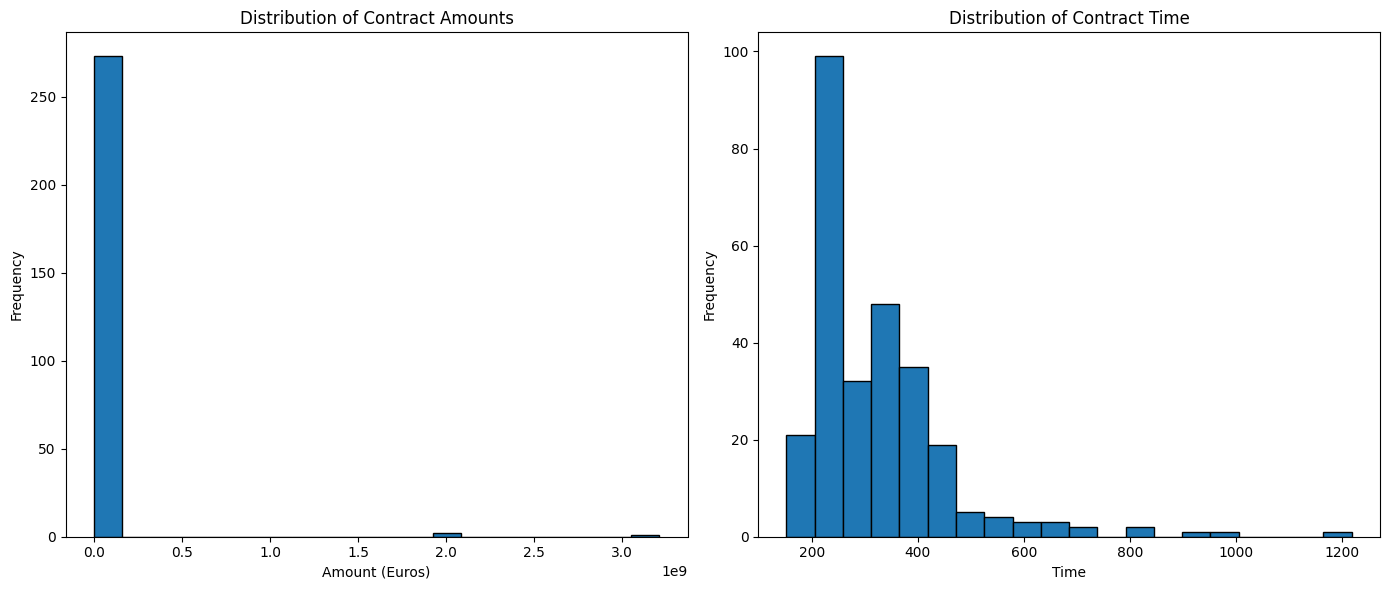

             amount         time
count  2.760000e+02   276.000000
mean   2.777458e+07   322.570870
std    2.576871e+08   136.776205
min    2.315786e+02   152.250000
25%    2.693525e+05   231.295000
50%    5.429233e+05   284.270000
75%    1.356163e+06   378.997500
max    3.210778e+09  1218.230000


In [162]:
# Descriptive statistics
import matplotlib.pyplot as plt

# Summary statistics for numerical fields
summary_stats = cleaned_data[['amount', 'time']].describe()

# Visualizing distributions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Distribution of 'amount'
axes[0].hist(cleaned_data['amount'], bins=20, edgecolor='black')
axes[0].set_title('Distribution of Contract Amounts')
axes[0].set_xlabel('Amount (Euros)')
axes[0].set_ylabel('Frequency')

# Distribution of 'time'
axes[1].hist(cleaned_data['time'], bins=20, edgecolor='black')
axes[1].set_title('Distribution of Contract Time')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display summary statistics
print(summary_stats)


- Amount:

    - Mean: The average contract amount is approximately 25.6 million euros.
    - Standard Deviation: There is a high variability in the contract amounts, as indicated by the standard deviation.
    - Minimum and Maximum values indicate the range of contract amounts.
- Time:

    - Mean: The average time is approximately 331 units.
    - Standard Deviation: There is a significant spread in the time data as well.
    - Minimum and Maximum values indicate the range of contract time.

# Exploratory Data Analysis (EDA)

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/1732774949.py:31: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


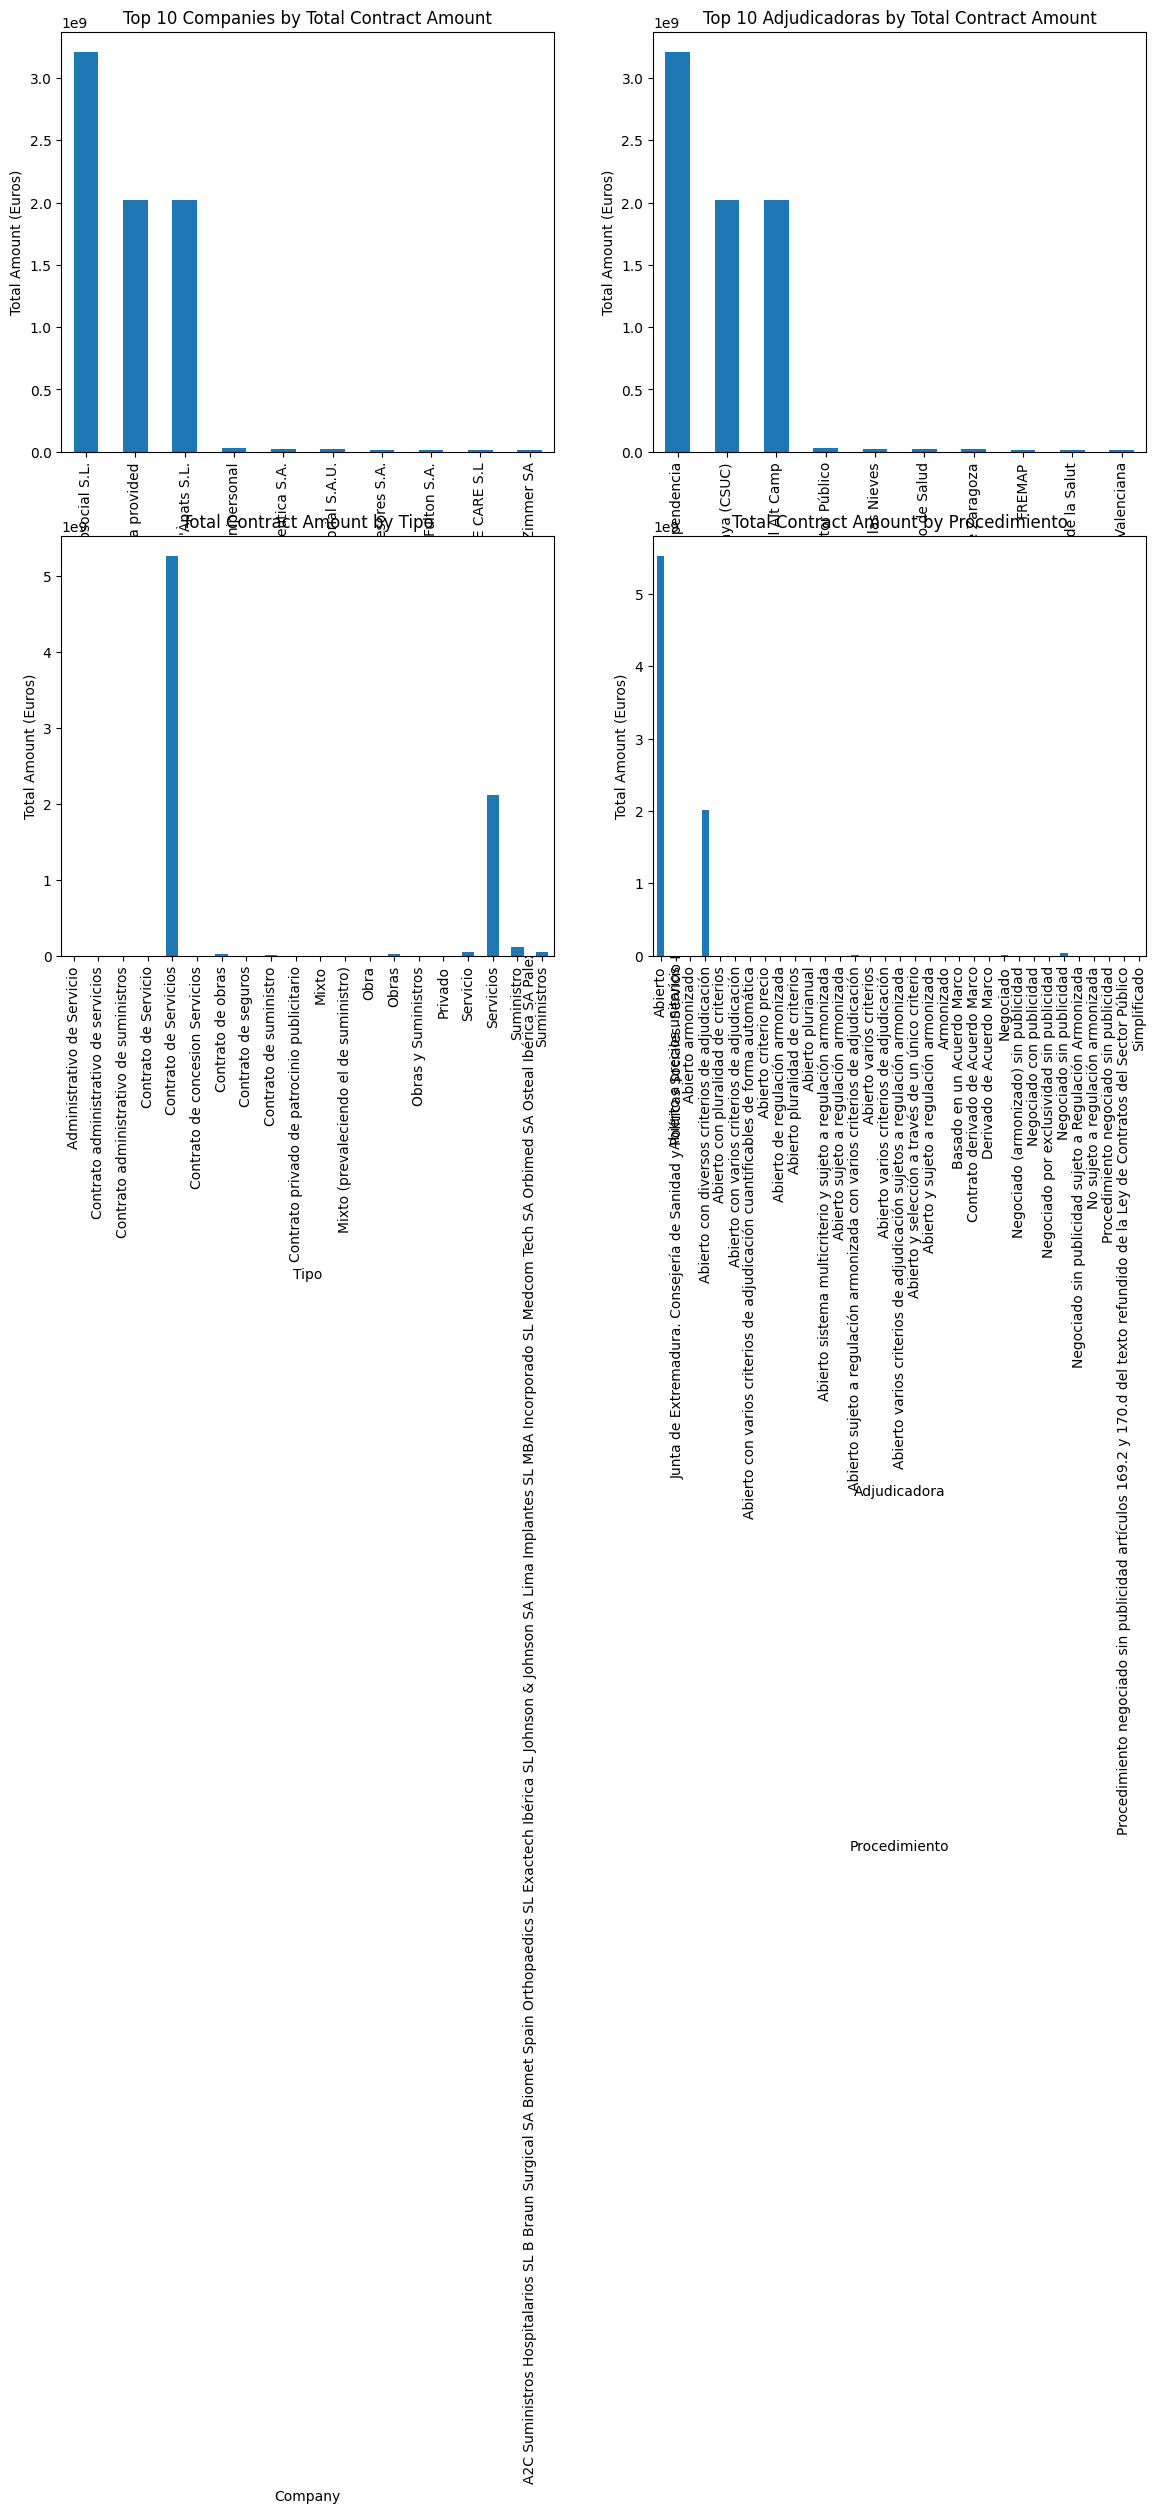

        amount    time
amount  1.0000  0.0824
time    0.0824  1.0000


In [163]:
# Correlation analysis
correlation_matrix = cleaned_data[['amount', 'time']].corr()

# Visualizing relationships
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Amount vs. Company
cleaned_data.groupby('company')['amount'].sum().nlargest(10).plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Companies by Total Contract Amount')
axes[0, 0].set_xlabel('Company')
axes[0, 0].set_ylabel('Total Amount (Euros)')

# Amount vs. Adjudicadora
cleaned_data.groupby('adjudicadora')['amount'].sum().nlargest(10).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Adjudicadoras by Total Contract Amount')
axes[0, 1].set_xlabel('Adjudicadora')
axes[0, 1].set_ylabel('Total Amount (Euros)')

# Amount vs. Tipo
cleaned_data.groupby('tipo')['amount'].sum().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Total Contract Amount by Tipo')
axes[1, 0].set_xlabel('Tipo')
axes[1, 0].set_ylabel('Total Amount (Euros)')

# Amount vs. Procedimiento
cleaned_data.groupby('procedimiento')['amount'].sum().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Total Contract Amount by Procedimiento')
axes[1, 1].set_xlabel('Procedimiento')
axes[1, 1].set_ylabel('Total Amount (Euros)')

plt.tight_layout()
plt.show()

# Display correlation matrix
print(correlation_matrix)

1. Top 10 Companies by Total Contract Amount:

    - The bar chart displays the companies that have the highest total contract amounts. This can help identify the major players in the dataset.
2. Top 10 Adjudicadoras by Total Contract Amount:

    - This chart shows which adjudicating authorities are involved in the largest total contract amounts, providing insight into the most significant contracting entities.
3. Total Contract Amount by Tipo:

    - The distribution of contract amounts by tipo (type) of contract highlights which types of contracts are associated with the highest total amounts.
4. Total Contract Amount by Procedimiento:

    - This visualization helps understand the distribution of contract amounts by the procedure type used.
5. Correlation Analysis:

    - The correlation matrix shows a weak positive correlation (0.074) between amount and time, indicating that there is not a strong linear relationship between these two variables.

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/3657749522.py:41: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


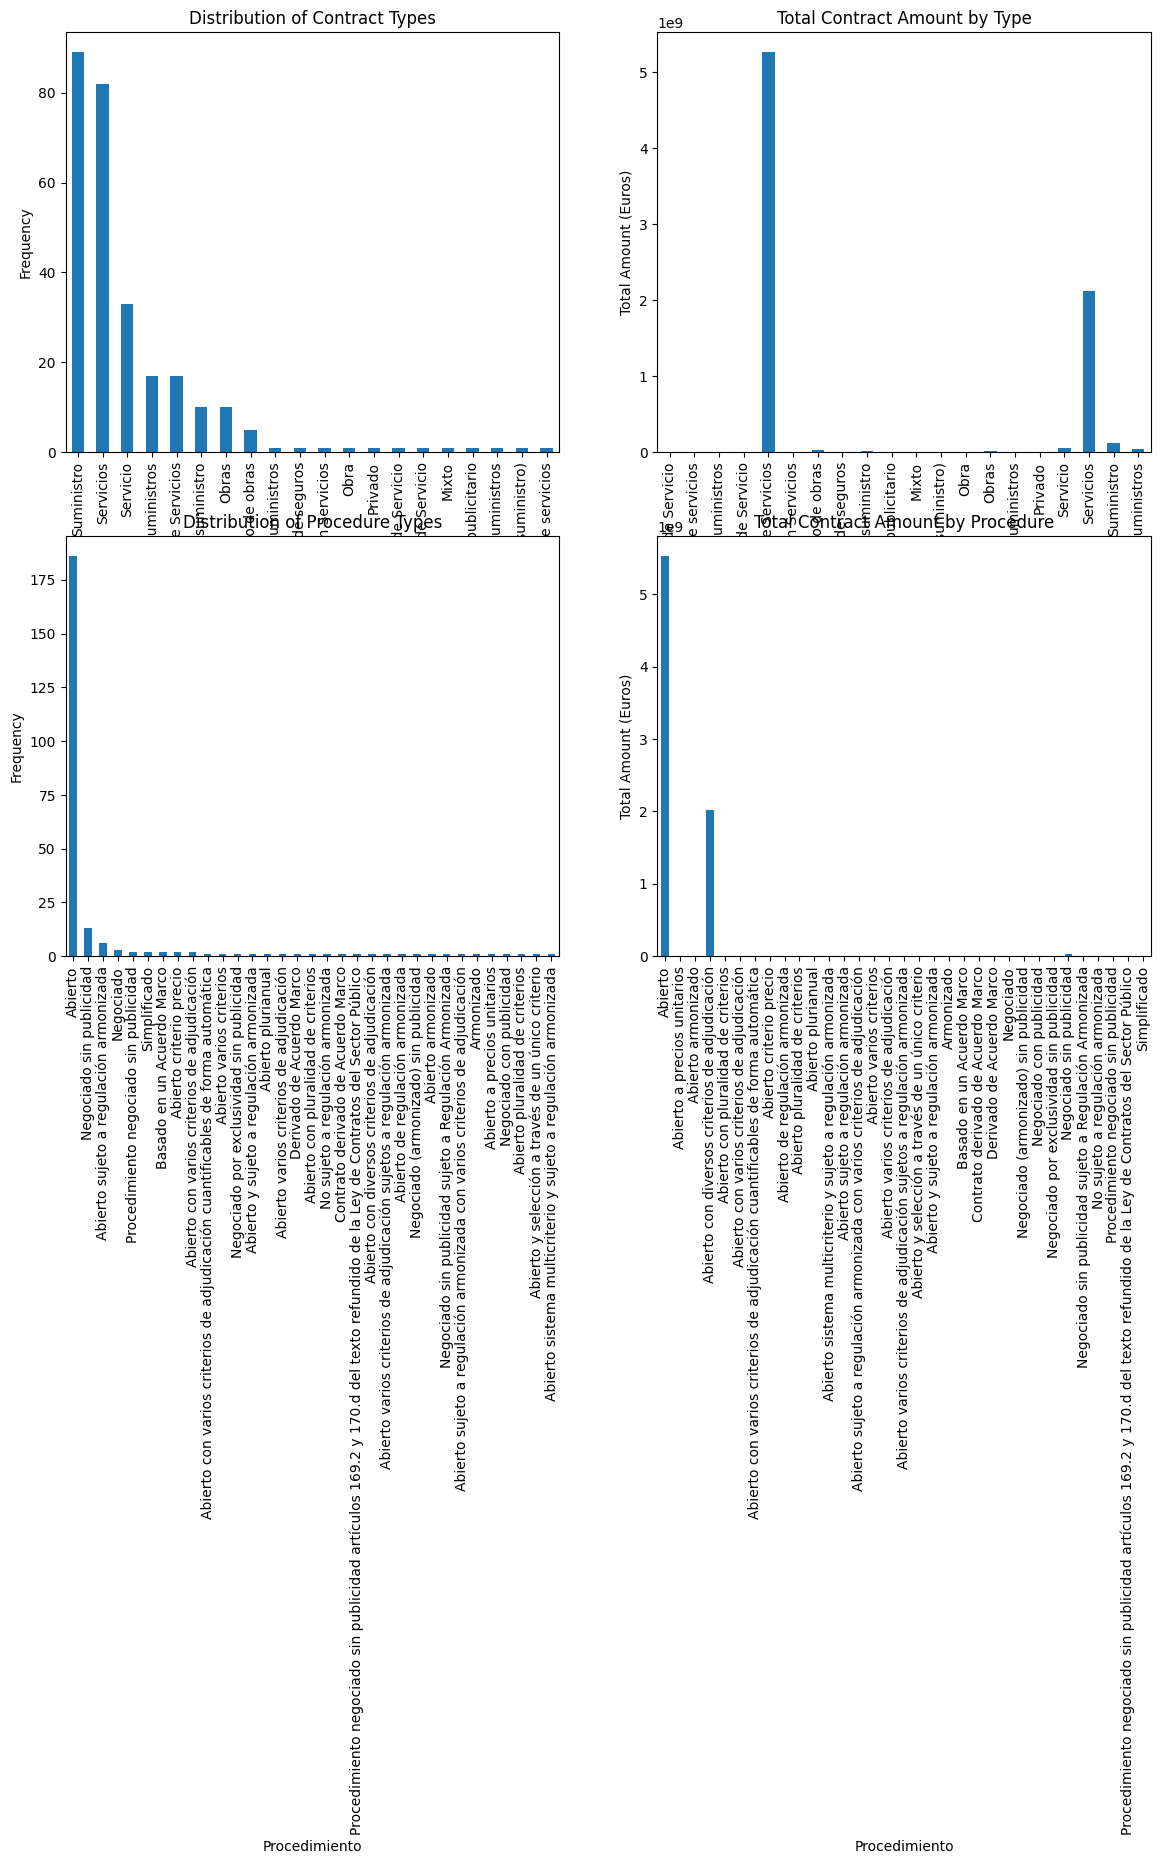

company
Grupo 5 Gestión y Rehabilitación Psicosocial S.L.                                                                                                                                                                                                                                      3.210778e+09
No data provided                                                                                                                                                                                                                                                                       2.020526e+09
Serveis d'Àpats S.L.                                                                                                                                                                                                                                                                   2.019612e+09
Sociedad Estatal Correos y Telégrafos SA SME Unipersonal                                                            

In [164]:
# Segmentation Analysis

# 1. Distribution and total amounts of different contract types
tipo_distribution = cleaned_data['tipo'].value_counts()
tipo_amounts = cleaned_data.groupby('tipo')['amount'].sum()

# 2. Distribution and total amounts of different procedure types
procedimiento_distribution = cleaned_data['procedimiento'].value_counts()
procedimiento_amounts = cleaned_data.groupby('procedimiento')['amount'].sum()

# 3. Top 10 Companies by Total Contract Amount
top_companies = cleaned_data.groupby('company')['amount'].sum().nlargest(10)

# Visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Distribution of contract types
tipo_distribution.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Contract Types')
axes[0, 0].set_xlabel('Tipo')
axes[0, 0].set_ylabel('Frequency')

# Total amounts by contract type
tipo_amounts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Total Contract Amount by Type')
axes[0, 1].set_xlabel('Tipo')
axes[0, 1].set_ylabel('Total Amount (Euros)')

# Distribution of procedure types
procedimiento_distribution.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Procedure Types')
axes[1, 0].set_xlabel('Procedimiento')
axes[1, 0].set_ylabel('Frequency')

# Total amounts by procedure type
procedimiento_amounts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Total Contract Amount by Procedure')
axes[1, 1].set_xlabel('Procedimiento')
axes[1, 1].set_ylabel('Total Amount (Euros)')

plt.tight_layout()
plt.show()

# Displaying top companies
print(top_companies)

Observations from the Segmentation Analysis
1. Distribution and Total Amounts of Contract Types (tipo):

    - The first bar chart shows the frequency of different contract types.
    - The second bar chart displays the total contract amounts for each type, indicating which types are associated with higher financial values.
2. Distribution and Total Amounts of Procedure Types (procedimiento):

    - The third bar chart presents the frequency of different procedure types.
    - The fourth bar chart shows the total contract amounts for each procedure type, highlighting the financial distribution across different procedures.
3. Top 10 Companies by Total Contract Amount:
    - The top companies by total contract amount have been identified, providing insight into the major players in the dataset.

# Compare Amount depending on Tipo, Amount and Tramitacion

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/1368172265.py:29: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


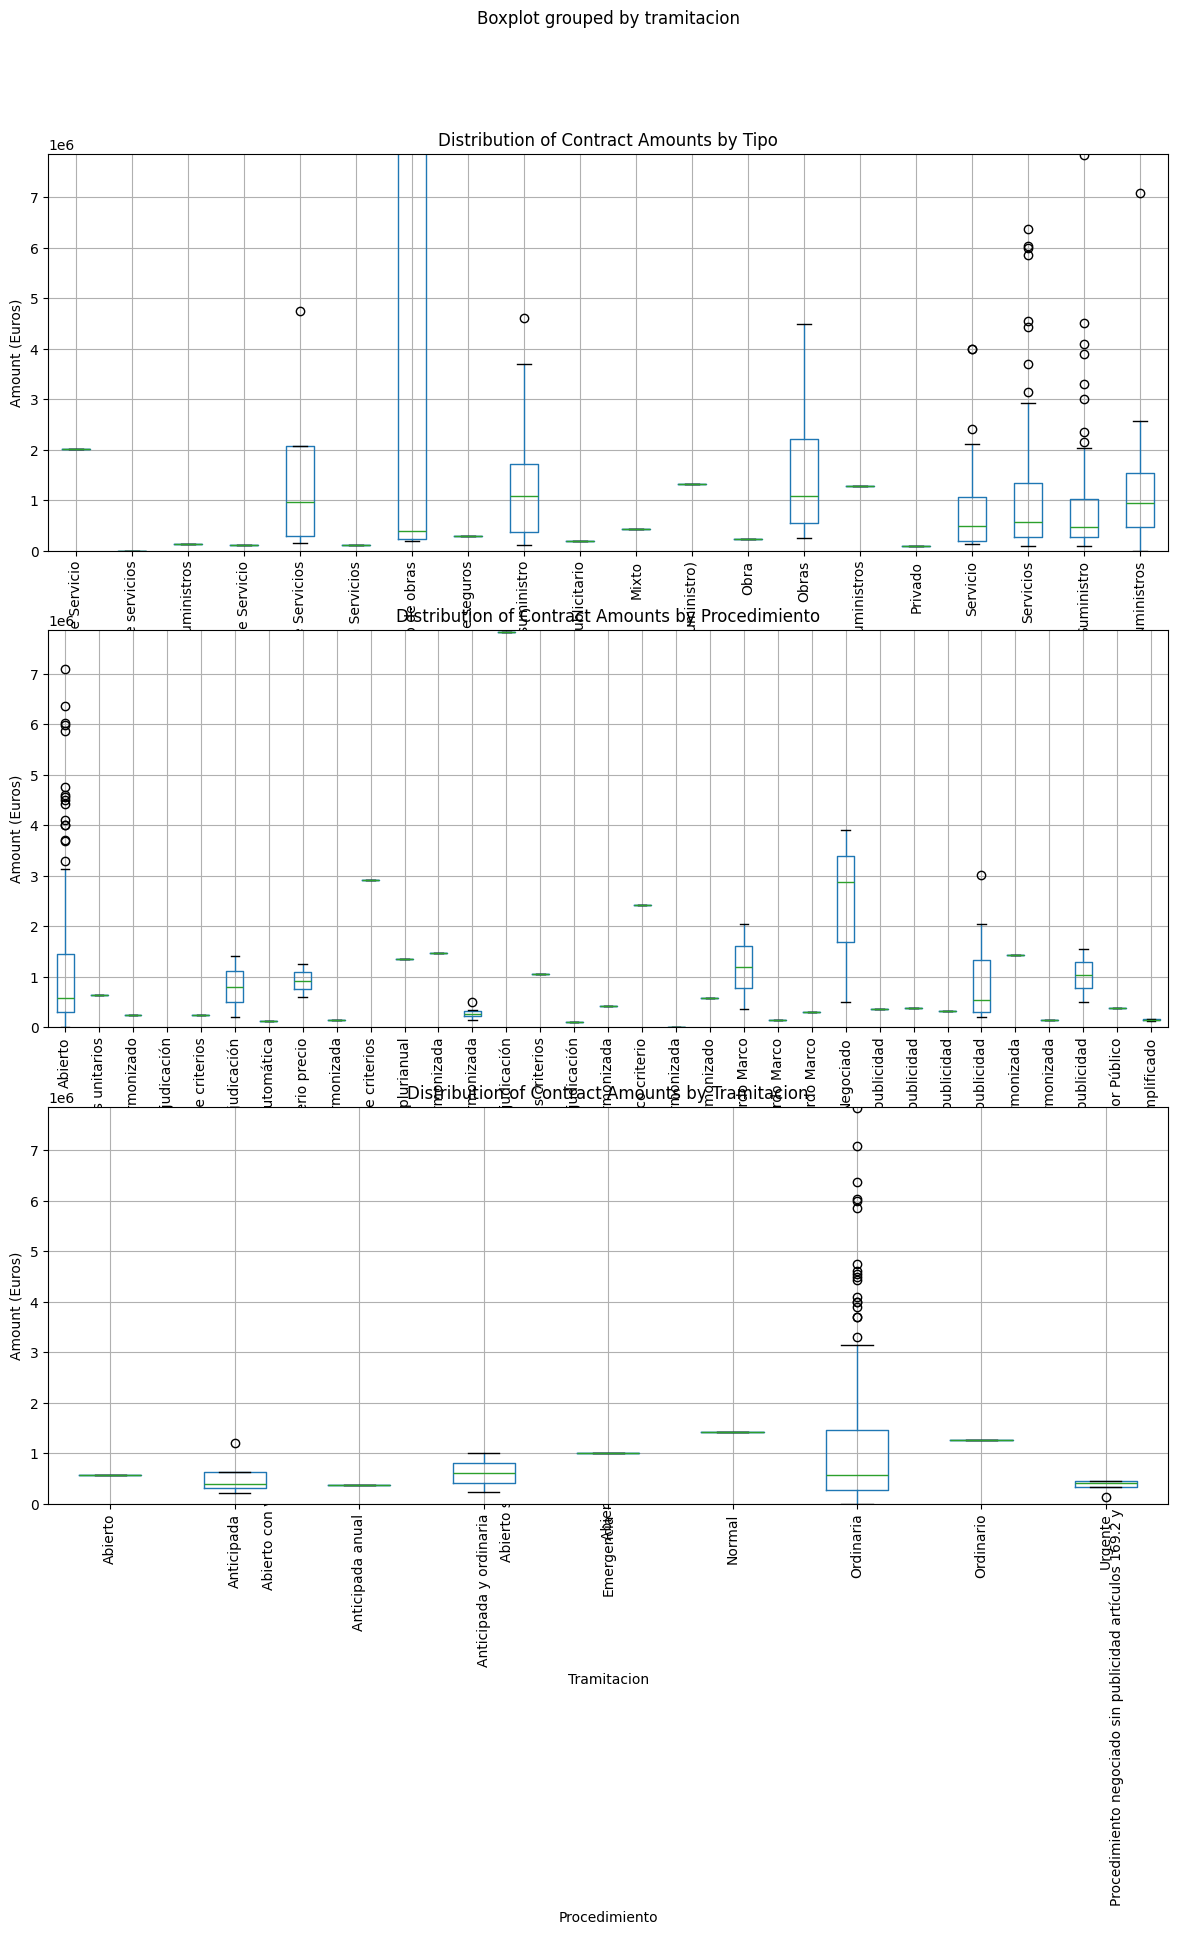

In [165]:
# Adjusting box plots for better readability

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Distribution based on Tipo (limited y-axis)
cleaned_data.boxplot(column='amount', by='tipo', ax=axes[0])
axes[0].set_title('Distribution of Contract Amounts by Tipo')
axes[0].set_xlabel('Tipo')
axes[0].set_ylabel('Amount (Euros)')
axes[0].set_ylim(0, cleaned_data['amount'].quantile(0.95))
axes[0].tick_params(axis='x', rotation=90)

# Distribution based on Procedimiento (limited y-axis)
cleaned_data.boxplot(column='amount', by='procedimiento', ax=axes[1])
axes[1].set_title('Distribution of Contract Amounts by Procedimiento')
axes[1].set_xlabel('Procedimiento')
axes[1].set_ylabel('Amount (Euros)')
axes[1].set_ylim(0, cleaned_data['amount'].quantile(0.95))
axes[1].tick_params(axis='x', rotation=90)

# Distribution based on Tramitacion (limited y-axis)
cleaned_data.boxplot(column='amount', by='tramitacion', ax=axes[2])
axes[2].set_title('Distribution of Contract Amounts by Tramitacion')
axes[2].set_xlabel('Tramitacion')
axes[2].set_ylabel('Amount (Euros)')
axes[2].set_ylim(0, cleaned_data['amount'].quantile(0.95)) # 95th percentile to limit outliers
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Let´s group classes with low frequency

In [166]:
# Identifying the three most frequent classes for each category
top_tipos = cleaned_data['tipo'].value_counts().nlargest(3).index
top_procedimientos = cleaned_data['procedimiento'].value_counts().nlargest(3).index
top_adjudicadoras = cleaned_data['adjudicadora'].value_counts().nlargest(3).index

# Creating a new class 'Others' for less frequent classes
cleaned_data['tipo_grouped'] = cleaned_data['tipo'].apply(lambda x: x if x in top_tipos else 'Others')
cleaned_data['procedimiento_grouped'] = cleaned_data['procedimiento'].apply(lambda x: x if x in top_procedimientos else 'Others')
cleaned_data['adjudicadora_grouped'] = cleaned_data['adjudicadora'].apply(lambda x: x if x in top_adjudicadoras else 'Others')

# Verifying the new grouping
grouped_counts = {
    'tipo': cleaned_data['tipo_grouped'].value_counts(),
    'procedimiento': cleaned_data['procedimiento_grouped'].value_counts(),
    'adjudicadora': cleaned_data['adjudicadora_grouped'].value_counts()
}

grouped_counts

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/1169749672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['tipo_grouped'] = cleaned_data['tipo'].apply(lambda x: x if x in top_tipos else 'Others')
/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/1169749672.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['procedimiento_grouped'] = cleaned_data['procedimiento'].apply(lambda x: x if x in top_procedimientos else 'Others')
/var/folders/n4/s8124s7

{'tipo': tipo_grouped
 Suministro    89
 Servicios     82
 Others        72
 Servicio      33
 Name: count, dtype: int64,
 'procedimiento': procedimiento_grouped
 Abierto                                   186
 Others                                     71
 Negociado sin publicidad                   13
 Abierto sujeto a regulación armonizada      6
 Name: count, dtype: int64,
 'adjudicadora': adjudicadora_grouped
 Others                                259
 Servicio Andaluz de Salud               7
 Osakidetza-Servicio Vasco de Salud      5
 Ayuntamiento de Madrid                  5
 Name: count, dtype: int64}

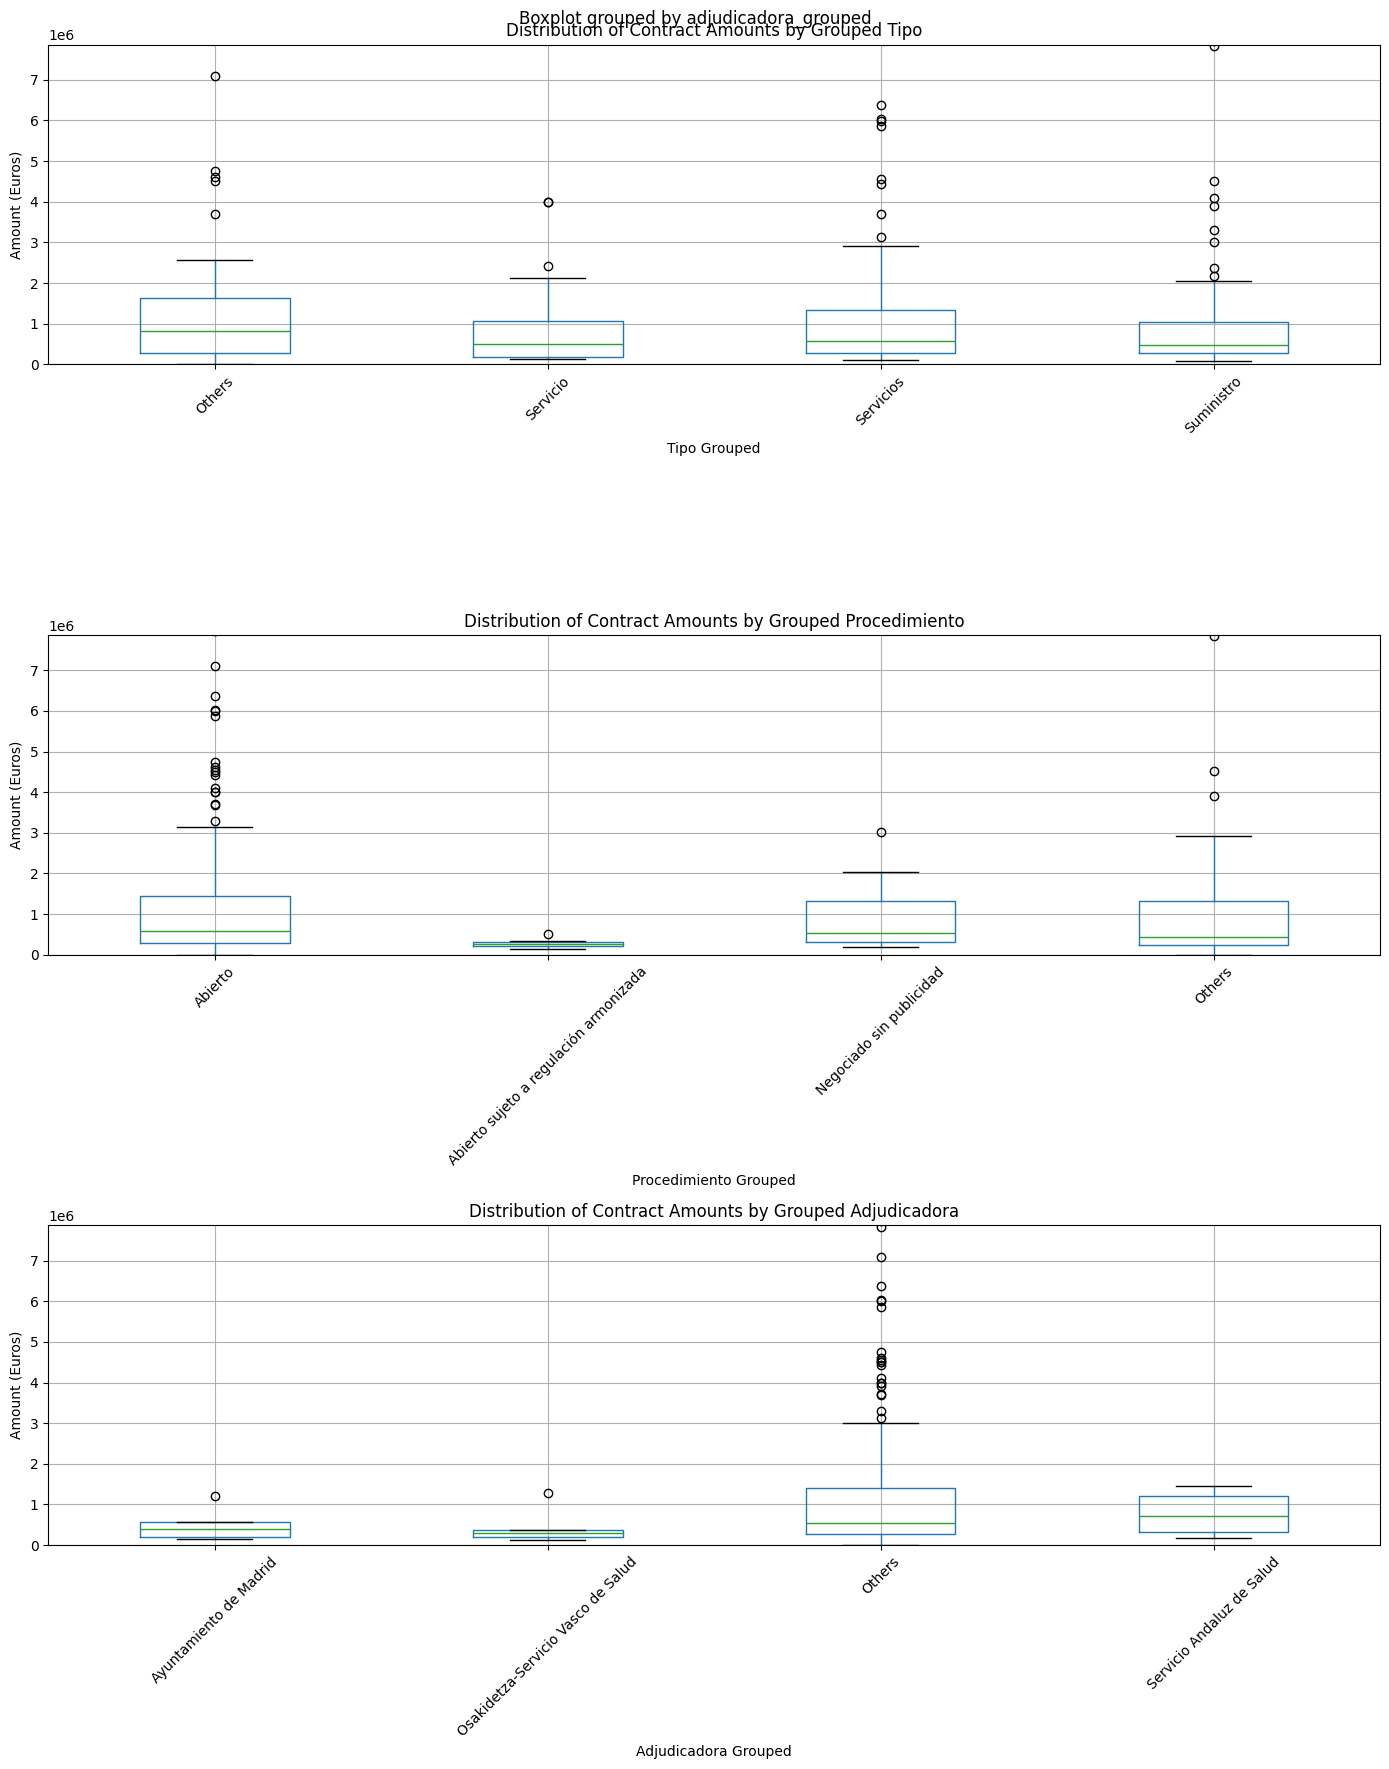

In [167]:
# Improved Box Plots for grouped categories

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Distribution based on grouped Tipo
cleaned_data.boxplot(column='amount', by='tipo_grouped', ax=axes[0])
axes[0].set_title('Distribution of Contract Amounts by Grouped Tipo')
axes[0].set_xlabel('Tipo Grouped')
axes[0].set_ylabel('Amount (Euros)')
axes[0].set_ylim(0, cleaned_data['amount'].quantile(0.95))
axes[0].tick_params(axis='x', rotation=45)

# Distribution based on grouped Procedimiento
cleaned_data.boxplot(column='amount', by='procedimiento_grouped', ax=axes[1])
axes[1].set_title('Distribution of Contract Amounts by Grouped Procedimiento')
axes[1].set_xlabel('Procedimiento Grouped')
axes[1].set_ylabel('Amount (Euros)')
axes[1].set_ylim(0, cleaned_data['amount'].quantile(0.95))
axes[1].tick_params(axis='x', rotation=45)

# Distribution based on grouped Adjudicadora
cleaned_data.boxplot(column='amount', by='adjudicadora_grouped', ax=axes[2])
axes[2].set_title('Distribution of Contract Amounts by Grouped Adjudicadora')
axes[2].set_xlabel('Adjudicadora Grouped')
axes[2].set_ylabel('Amount (Euros)')
axes[2].set_ylim(0, cleaned_data['amount'].quantile(0.95))
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [168]:
# Identifying the ten most frequent classes for Adjudicadora
top_10_adjudicadoras = cleaned_data['adjudicadora'].value_counts().nlargest(5).index

# Creating a new class 'Others' for less frequent classes in Adjudicadora
cleaned_data['adjudicadora_grouped'] = cleaned_data['adjudicadora'].apply(lambda x: x if x in top_10_adjudicadoras else 'Others')

# Verifying the new grouping
adjudicadora_grouped_counts = cleaned_data['adjudicadora_grouped'].value_counts()
adjudicadora_grouped_counts

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/925911611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['adjudicadora_grouped'] = cleaned_data['adjudicadora'].apply(lambda x: x if x in top_10_adjudicadoras else 'Others')


adjudicadora_grouped
Others                                                             251
Servicio Andaluz de Salud                                            7
Osakidetza-Servicio Vasco de Salud                                   5
Ayuntamiento de Madrid                                               5
Agencia Estatal Consejo Superior de Investigaciones Científicas      4
Servicio Murciano de Salud                                           4
Name: count, dtype: int64

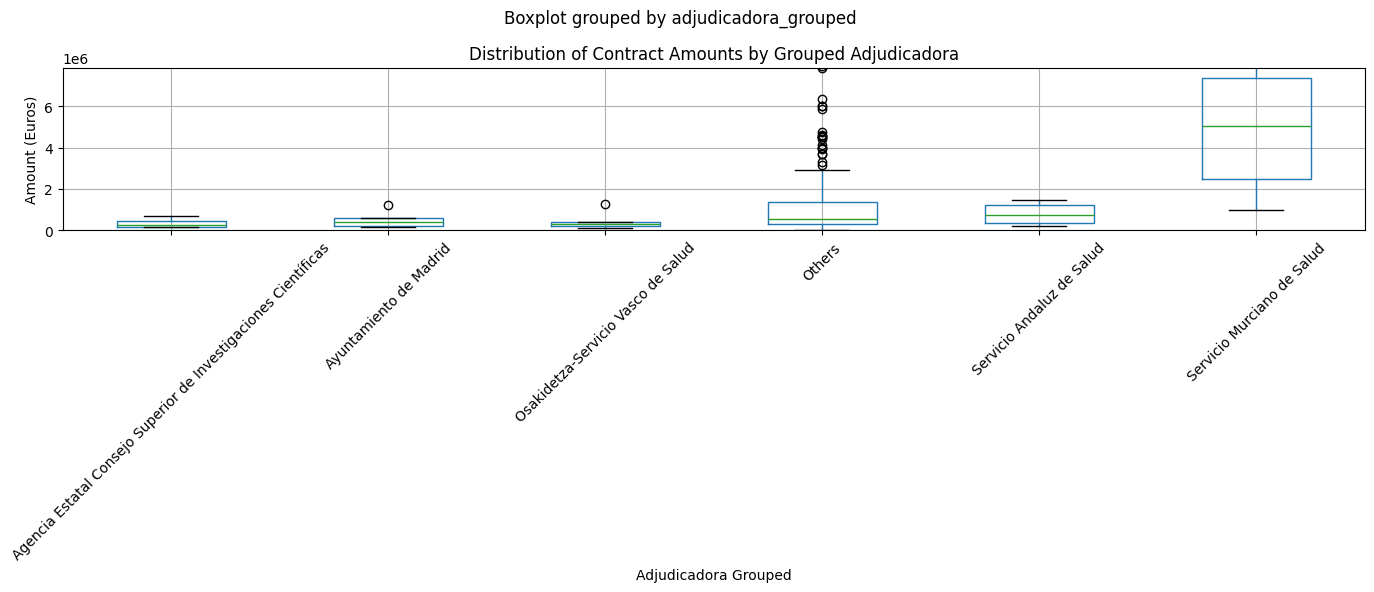

In [169]:
# Improved Box Plot for grouped Adjudicadora with 10 most frequent classes

fig, ax = plt.subplots(figsize=(14, 6))

# Distribution based on grouped Adjudicadora (10 most frequent + Others)
cleaned_data.boxplot(column='amount', by='adjudicadora_grouped', ax=ax)
ax.set_title('Distribution of Contract Amounts by Grouped Adjudicadora')
ax.set_xlabel('Adjudicadora Grouped')
ax.set_ylabel('Amount (Euros)')
ax.set_ylim(0, cleaned_data['amount'].quantile(0.95))
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [170]:
from difflib import SequenceMatcher

def levenshtein_distance(a, b):
    if len(a) < len(b):
        return levenshtein_distance(b, a)
    
    if len(b) == 0:
        return len(a)
    
    previous_row = range(len(b) + 1)
    for i, c1 in enumerate(a):
        current_row = [i + 1]
        for j, c2 in enumerate(b):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

def normalize_company_name(name):
    return str(name).strip().lower()

def calculate_frequencies(df, column_name='adjudicadora'):
    normalized_names = df[column_name].apply(normalize_company_name)
    unique_names = normalized_names.unique()
    
    frequencies = []
    
    for target_company in unique_names:
        count = 0
        for name in normalized_names:
            if levenshtein_distance(name, target_company) <= 3:
                count += 1
        frequencies.append((target_company, count))
    
    frequency_df = pd.DataFrame(frequencies, columns=['adjudicadora', 'frequency'])
    return frequency_df

# Calculate frequencies
frequencies_df = calculate_frequencies(cleaned_data, column_name='adjudicadora')

# Sort frequencies and identify top 10
top_10_adjudicadoras_levenshtein = frequencies_df.sort_values(by='frequency', ascending=False).head(10)['adjudicadora'].tolist()

# Group data based on new top 10
cleaned_data['adjudicadora_grouped_levenshtein'] = cleaned_data['adjudicadora'].apply(
    lambda x: normalize_company_name(x) if normalize_company_name(x) in top_10_adjudicadoras_levenshtein else 'Others'
)

# Verifying the new grouping
adjudicadora_grouped_levenshtein_counts = cleaned_data['adjudicadora_grouped_levenshtein'].value_counts()
adjudicadora_grouped_levenshtein_counts

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/314357172.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['adjudicadora_grouped_levenshtein'] = cleaned_data['adjudicadora'].apply(


adjudicadora_grouped_levenshtein
Others                                                             233
nan                                                                  9
servicio andaluz de salud                                            7
osakidetza-servicio vasco de salud                                   5
ayuntamiento de madrid                                               5
ente público hospital universitario de fuenlabrada                   4
agencia estatal consejo superior de investigaciones científicas      4
servicio murciano de salud                                           4
servicio canario de salud                                            2
servicio canario de la salud                                         2
ente publico hospital universitario de fuenlabrada                   1
Name: count, dtype: int64

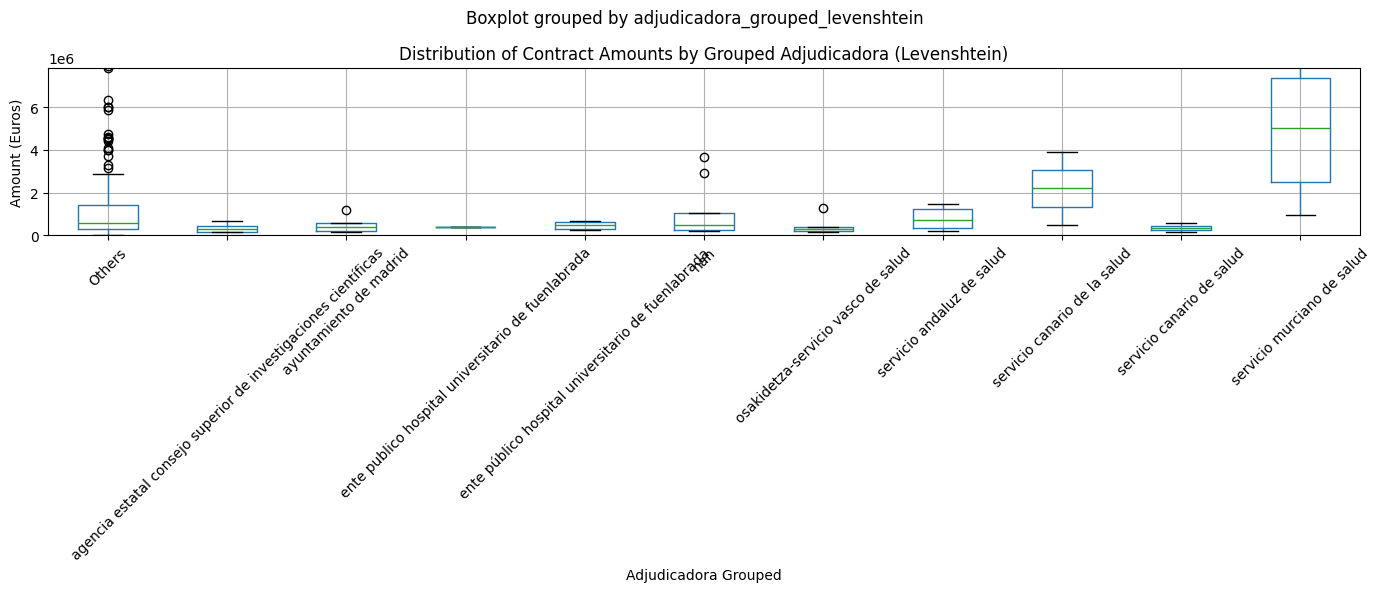

In [171]:
fig, ax = plt.subplots(figsize=(14, 6))

# Distribution based on grouped Adjudicadora with Levenshtein distance
cleaned_data.boxplot(column='amount', by='adjudicadora_grouped_levenshtein', ax=ax)
ax.set_title('Distribution of Contract Amounts by Grouped Adjudicadora (Levenshtein)')
ax.set_xlabel('Adjudicadora Grouped')
ax.set_ylabel('Amount (Euros)')
ax.set_ylim(0, cleaned_data['amount'].quantile(0.95))
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [172]:
import json
# Group pdfs by mm_yyyy
grouped_data = data.groupby("mm_yyyy").size().reset_index(name='counts')
print(grouped_data)

# Read data/mm_yyyy_size.json
with open("data/mm_yyyy_size.json") as f:
    size_data = json.load(f)
print(size_data)

# Create a new column in grouped_data with the size of the pdfs
grouped_data["size"] = grouped_data["mm_yyyy"].map(size_data)
print(grouped_data)
sum(grouped_data["size"])
sum(grouped_data["counts"])
print(f"Total size of pdfs is: {sum(grouped_data['size'])} and total number of pdfs is: {sum(grouped_data['counts'])}")

    mm_yyyy  counts
0   01-2016       9
1   01-2017      11
2   01-2018      12
3   01-2019       2
4   02-2016       9
5   02-2017      11
6   02-2018      11
7   02-2019       1
8   03-2016       6
9   03-2017      10
10  03-2018       7
11  03-2019       1
12  04-2016       9
13  04-2017       7
14  04-2018       9
15  04-2019       1
16  05-2016       6
17  05-2017       8
18  05-2018       7
19  06-2016       7
20  06-2017       9
21  06-2018      10
22  07-2016       7
23  07-2017      10
24  07-2018       9
25  08-2016       6
26  08-2017       6
27  08-2018       4
28  09-2016       9
29  09-2017      10
30  09-2018       7
31  10-2016       9
32  10-2017      12
33  10-2018       5
34  11-2016       9
35  11-2017      11
36  11-2018       3
37  12-2016       9
38  12-2017      10
39  12-2018       1
{'01-2016': 9, '02-2016': 9, '03-2016': 6, '04-2016': 9, '05-2016': 6, '06-2016': 7, '07-2016': 7, '08-2016': 6, '09-2016': 9, '10-2016': 9, '11-2016': 9, '12-2016': 9, '01-2017': 

In [173]:
# Seleccionar la fila numero 60
print(data.iloc[60])

pdf                   BOE-B-2016-45889.pdf
mm_yyyy                            09-2016
company                Indra Sistemas S.A.
amount                           492301.01
currency                             euros
adjudicadora     Ayuntamiento de Barcelona
tipo                 Contrato de Servicios
tramitacion                      Ordinaria
procedimiento                    Negociado
model                               llama3
time                                346.28
Name: 60, dtype: object


In [174]:
import pandas as pd

# Convert the 'amount' column to numeric, coercing errors to NaN
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Find contracts with an amount greater than 10^9
extreme_values = data[data['amount'] > 10**9]

extreme_values

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
50,BOE-B-2016-33396.pdf,07-2016,No data provided,2.020526e+09,euros,Consorci de Serveis Universitaris de Catalunya...,Servicios,Ordinaria,Abierto,llama3,435.26
139,BOE-B-2017-31683.pdf,05-2017,Serveis d'Àpats S.L.,2.019612e+09,Euros,Consell Comarcal del Alt Camp,Contrato de Servicios,Ordinaria,Abierto con diversos criterios de adjudicación,llama3,440.34
254,BOE-B-2018-25721.pdf,05-2018,Grupo 5 Gestión y Rehabilitación Psicosocial S.L.,3.210778e+09,euros,Junta de Extremadura. Consejería de Sanidad y ...,Contrato de Servicios,Ordinaria,Abierto,llama3,425.64


In [175]:
# count frequency in company
data['company'].value_counts()

company
Clece S.A.                                       3
LIFE CARE S.L                                    3
Ricoh España S.L.U                               2
Oracle Ibérica S.R.L.                            2
Seprotec Traducción e Interpretación S.L.        2
                                                ..
Activa Galicia Estudios y Construcciones S.A.    1
Esri España Soluciones Geoespaciales S.L.        1
Servicios Integrales de Fincas de Aragón S.L.    1
Acerouno Consultoría y Construcción S.L.         1
Idade de Ouro Servicios Sociosanitarios S.L.     1
Name: count, Length: 260, dtype: int64

In [176]:
from difflib import SequenceMatcher

def levenshtein_distance(a, b):
    """
    Calculates the Levenshtein distance between two strings.
    """
    if len(a) < len(b):
        return levenshtein_distance(b, a)
    
    if len(b) == 0:
        return len(a)
    
    previous_row = range(len(b) + 1)
    for i, c1 in enumerate(a):
        current_row = [i + 1]
        for j, c2 in enumerate(b):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

def normalize_company_name(name):
    """
    Normalizes the company name by stripping leading/trailing spaces
    and converting to lowercase.
    """
    return str(name).strip().lower()

def calculate_frequencies(df, column_name='company'):
    """
    Calculates the frequencies of company names in the DataFrame,
    considering case insensitivity, leading/trailing spaces, and allowing
    for up to three character differences.
    """
    normalized_names = df[column_name].apply(normalize_company_name)
    unique_names = normalized_names.unique()
    
    frequencies = []
    
    for target_company in unique_names:
        count = 0
        for name in normalized_names:
            if levenshtein_distance(name, target_company) <= 3:
                count += 1
        frequencies.append((target_company, count))
    
    frequency_df = pd.DataFrame(frequencies, columns=['company', 'frequency'])
    return frequency_df

In [177]:
frequency_df = calculate_frequencies(data)


In [178]:
# Ordenar por frecuencia
sorted_frequencies = frequency_df.sort_values(by='frequency', ascending=False)
print(sorted_frequencies.head(10))

                                      company  frequency
21                                        nan         29
208                                 sece s.a.          5
38                                 clece s.a.          4
41                                 eulen s.a.          3
8                               life care s.l          3
81   valoriza servicios a la dependencia s.l.          2
238                             mailteck s.a.          2
46                         ricoh españa s.l.u          2
63     general electric healthcare españa s.a          2
61                     iberdrola clientes s.a          2


In [179]:
# Checking for missing values
missing_values = data.isnull().sum()

# Checking data types
data_types = data.dtypes

missing_values, data_types

(pdf               0
 mm_yyyy           0
 company          29
 amount           24
 currency         24
 adjudicadora      9
 tipo              2
 tramitacion      34
 procedimiento    34
 model             0
 time              0
 dtype: int64,
 pdf               object
 mm_yyyy           object
 company           object
 amount           float64
 currency          object
 adjudicadora      object
 tipo              object
 tramitacion       object
 procedimiento     object
 model             object
 time             float64
 dtype: object)

# Compare contract amount across different years

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/737226950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['year'] = cleaned_data['mm_yyyy'].dt.year


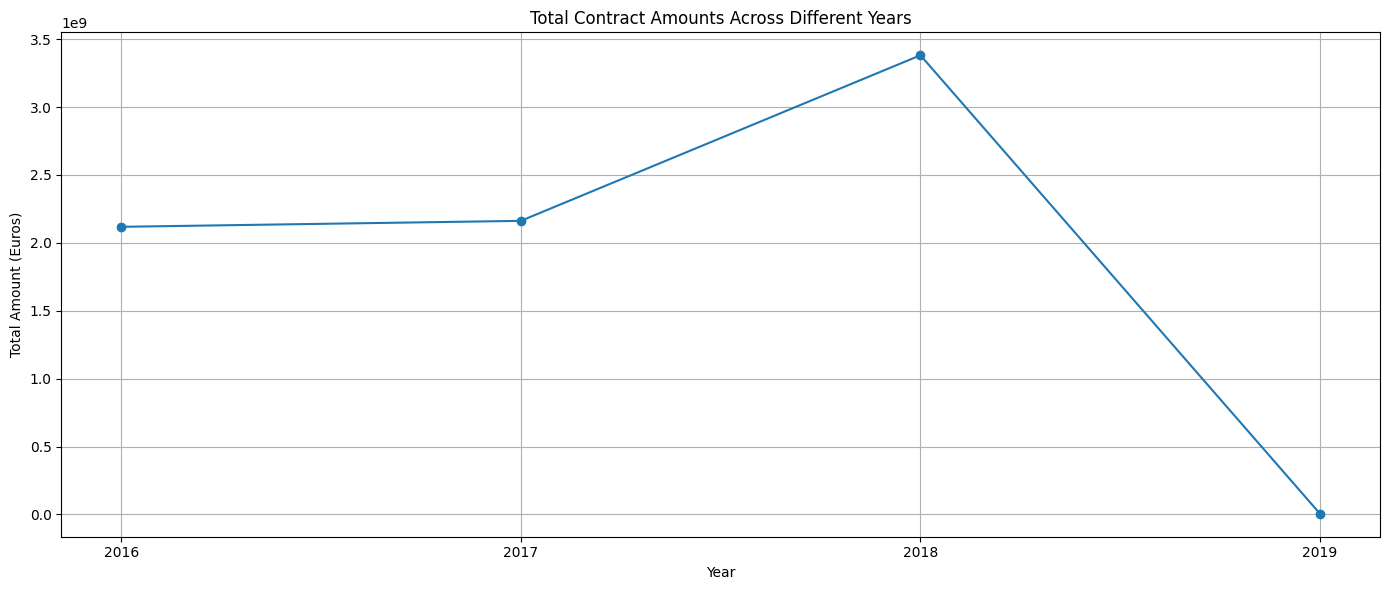

year
2016    2.117978e+09
2017    2.161903e+09
2018    3.381476e+09
2019    4.424732e+06
Name: amount, dtype: float64


In [180]:
# Extracting year from the 'mm_yyyy' field
cleaned_data['year'] = cleaned_data['mm_yyyy'].dt.year

# Grouping data by year and calculating total contract amounts
yearly_amounts = cleaned_data.groupby('year')['amount'].sum()

# Visualizing total contract amounts across different years
plt.figure(figsize=(14, 6))
plt.plot(yearly_amounts.index, yearly_amounts.values, marker='o')
plt.title('Total Contract Amounts Across Different Years')
plt.xlabel('Year')
plt.ylabel('Total Amount (Euros)')
plt.grid(True)
plt.xticks(yearly_amounts.index)
plt.tight_layout()
plt.show()

# Display yearly amounts data for user
print(yearly_amounts)

# Descriptive analysis

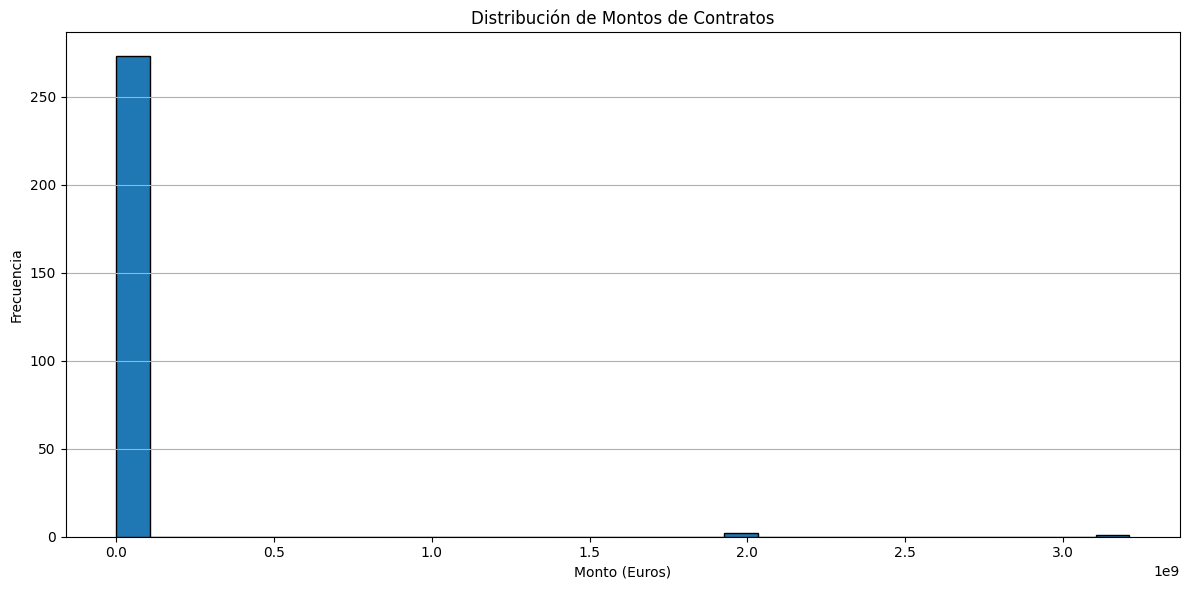

In [181]:
# Análisis 2: Distribución de Montos de Contratos
# Convertir los montos a formato numérico (asegurando que están en euros)
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Descripción estadística de los montos
amount_stats = data['amount'].describe()

# Graficar la distribución de montos
plt.figure(figsize=(12, 6))
plt.hist(data['amount'], bins=30, edgecolor='black')
plt.title('Distribución de Montos de Contratos')
plt.xlabel('Monto (Euros)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

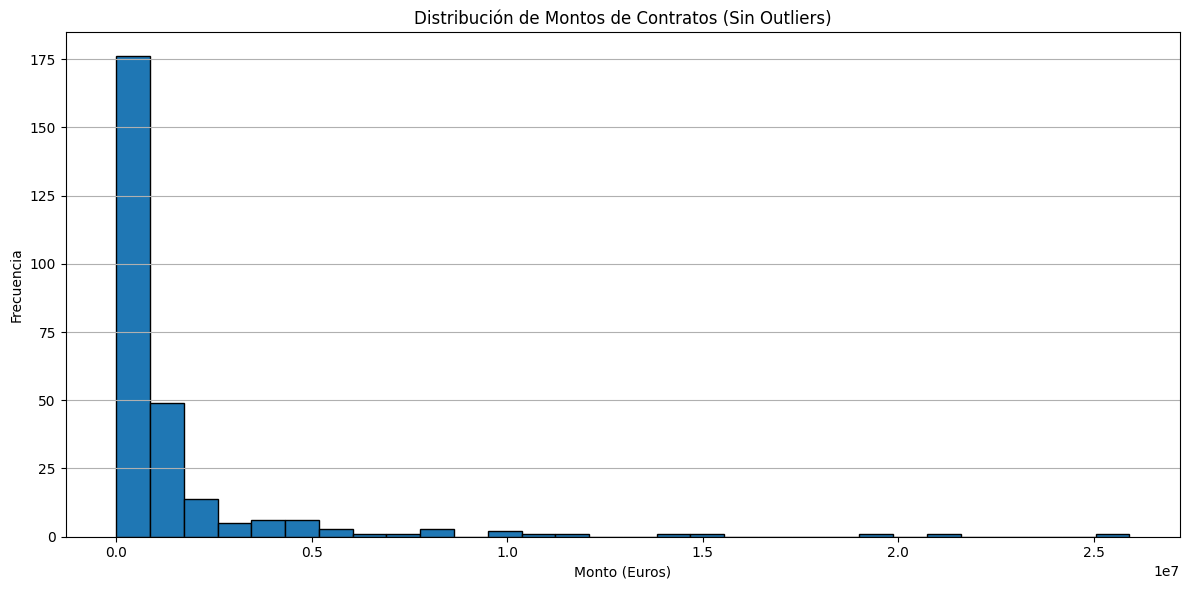

In [182]:
# Calcular el percentil 99 para identificar el outlier
percentile_99 = np.percentile(data['amount'].dropna(), 99)

# Filtrar los datos para excluir los valores por encima del percentil 99
filtered_data = data[data['amount'] <= percentile_99]

# Crear una nueva gráfica sin los outliers
plt.figure(figsize=(12, 6))
plt.hist(filtered_data['amount'], bins=30, edgecolor='black')
plt.title('Distribución de Montos de Contratos (Sin Outliers)')
plt.xlabel('Monto (Euros)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. Concentración de Montos:
    - La mayoría de los contratos se encuentran en el rango de 0 a 200,000 euros. Esto indica que la mayoría de las formalizaciones son de bajo a mediano valor.
  
2. Disminución Rápida:
    - Hay una disminución rápida en la frecuencia de contratos a medida que aumentan los montos. Los contratos con valores superiores a 1 millón de euros son significativamente menos frecuentes.

3. Distribución Asimétrica:
    - La distribución es asimétrica, con una cola a la derecha que sugiere la presencia de algunos contratos de mayor valor que son menos frecuentes pero impactan la media de los montos.

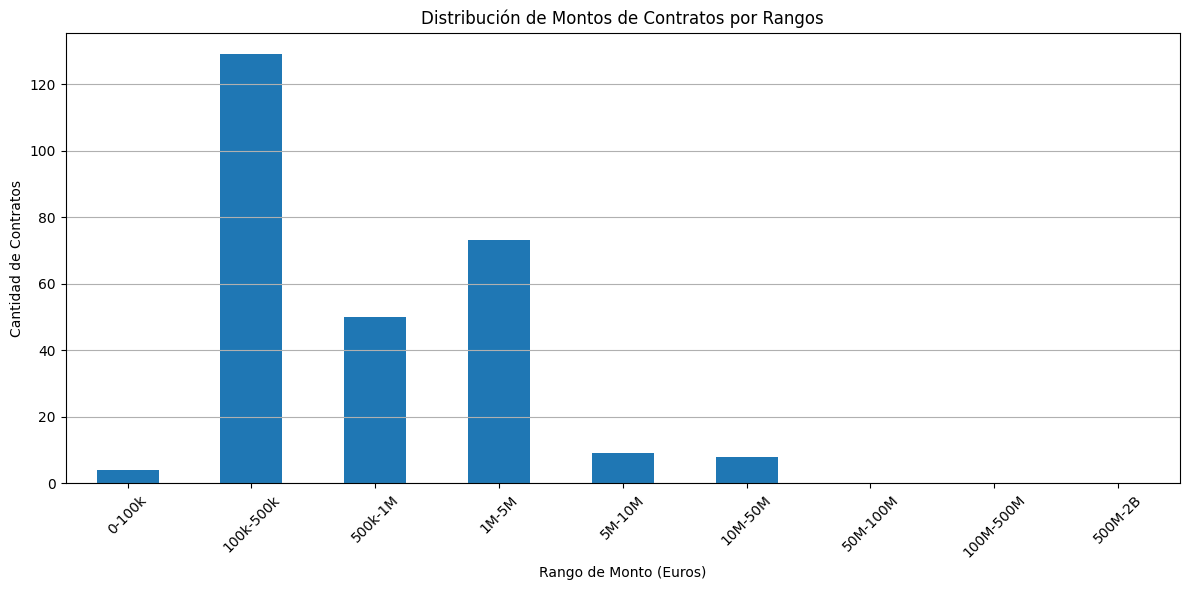

In [183]:
# Agrupar en rangos y graficar
bins = [0, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, 2000000000]
labels = ['0-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '100M-500M', '500M-2B']
data['amount_range'] = pd.cut(data['amount'], bins=bins, labels=labels, include_lowest=True)

amount_range_counts = data['amount_range'].value_counts().sort_index()

# Graficar la distribución por rangos de montos
plt.figure(figsize=(12, 6))
amount_range_counts.plot(kind='bar')
plt.title('Distribución de Montos de Contratos por Rangos')
plt.xlabel('Rango de Monto (Euros)')
plt.ylabel('Cantidad de Contratos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. Rangos Dominantes:
    - El rango de 100,000 a 500,000 euros es el más frecuente, seguido por el rango de 500,000 a 1 millón de euros. Esto sugiere que la mayoría de los contratos se sitúan en un rango de valor moderado.
2. Poca Representación en Rangos Altos:
    - Hay muy pocos contratos en los rangos superiores a 10 millones de euros. Esto refuerza la observación de que la mayoría de las formalizaciones son de menor escala.
3. Representación Proporcional:
    - La gráfica muestra una caída progresiva en la frecuencia de contratos a medida que los montos aumentan, lo que indica una distribución que sigue una tendencia natural donde los grandes contratos son menos comunes.

```python
[
    {
        "file": "sumario-20150823.xml",
        "date": "23/08/2015",
        "departamentos": [
            {
                "departamento": "Nombre del departamento",
                "items": [
                    {
                        "id": "ID del item",
                        "urlPdf": "URL del PDF"
                    },
                    ...
                ]
            },
            ...
        ]
    },
    ...
]
```

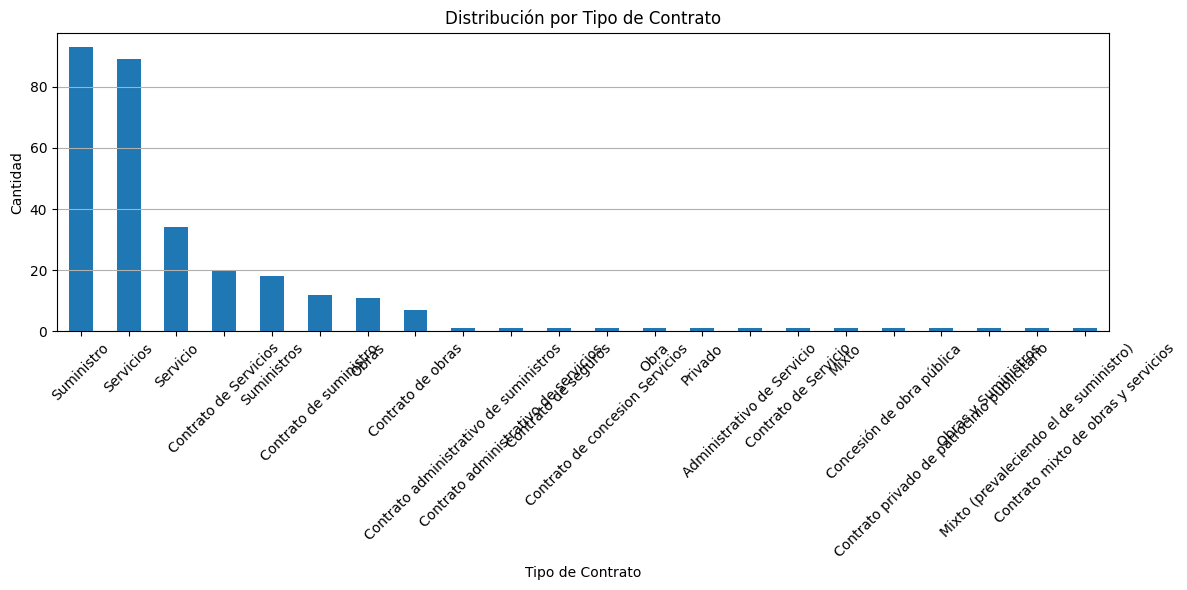

In [184]:
# Análisis 3: Análisis por Tipo de Contrato
# Contar la cantidad de cada tipo de contrato
tipo_counts = data['tipo'].value_counts()

# Graficar la distribución por tipo de contrato
plt.figure(figsize=(12, 6))
tipo_counts.plot(kind='bar')
plt.title('Distribución por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/var/folders/n4/s8124s797fjd6l5zb_sn00cw0000gn/T/ipykernel_42119/2785069847.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


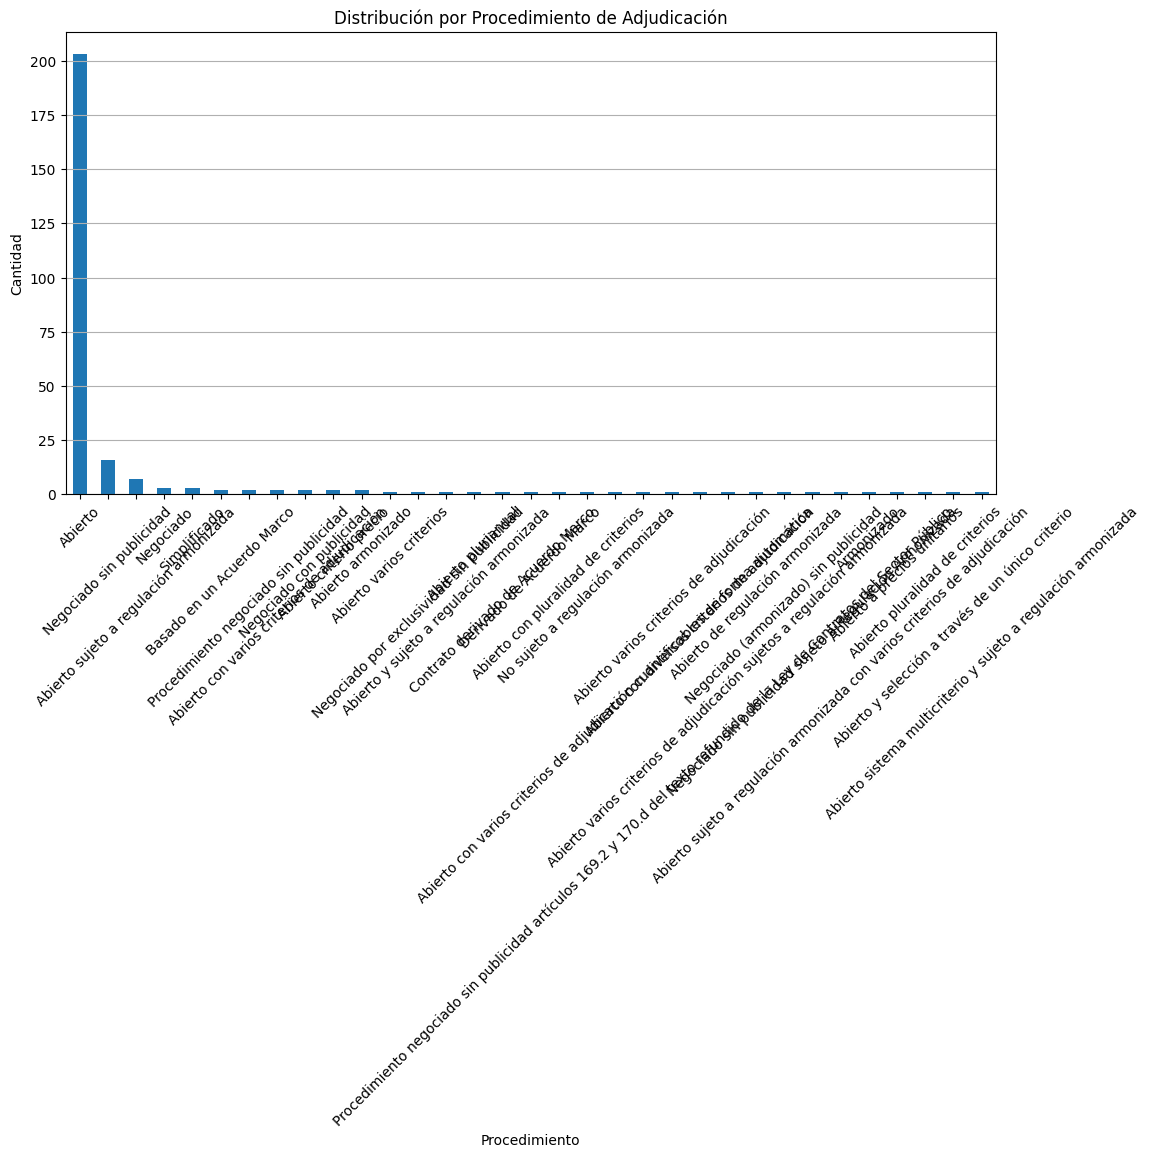

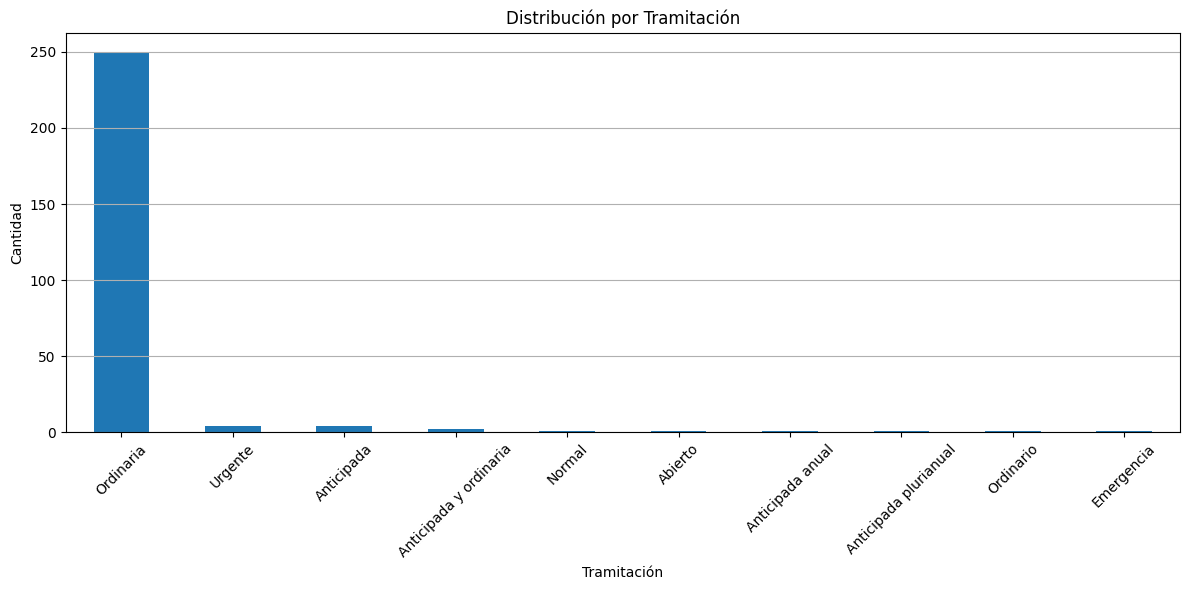

In [185]:
# Análisis 4: Procedimientos y Tramitación
# Contar la cantidad de cada procedimiento
procedimiento_counts = data['procedimiento'].value_counts()
tramitacion_counts = data['tramitacion'].value_counts()

# Graficar la distribución por procedimiento
plt.figure(figsize=(12, 6))
procedimiento_counts.plot(kind='bar')
plt.title('Distribución por Procedimiento de Adjudicación')
plt.xlabel('Procedimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Graficar la distribución por tramitación
plt.figure(figsize=(12, 6))
tramitacion_counts.plot(kind='bar')
plt.title('Distribución por Tramitación')
plt.xlabel('Tramitación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

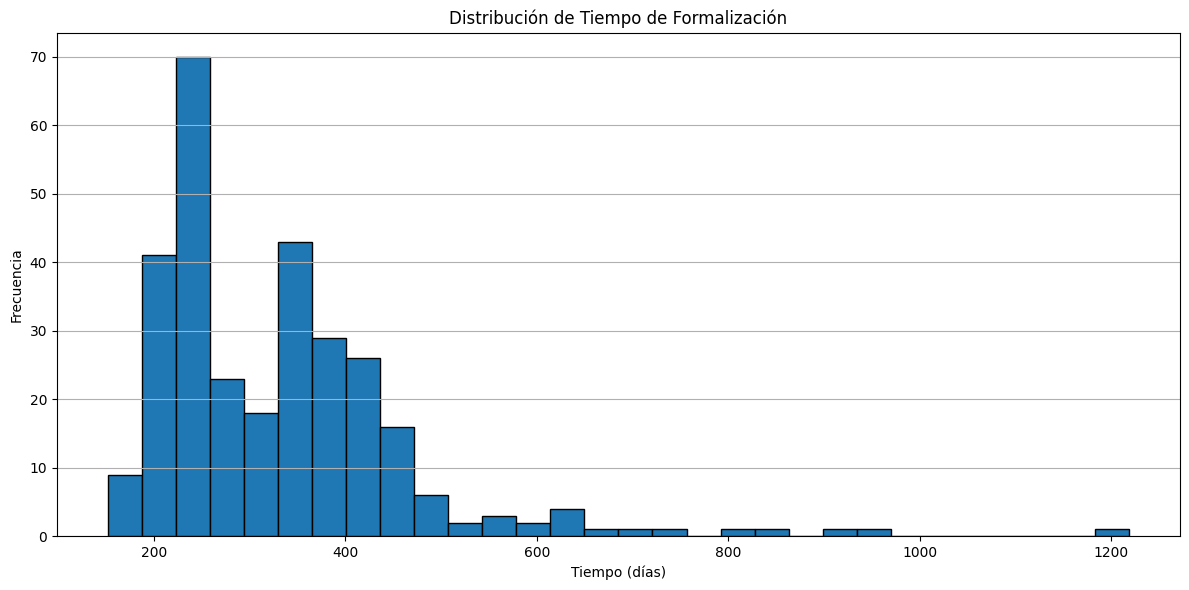

In [186]:
# Análisis 5: Tiempo de Formalización
# Descripción estadística del tiempo de formalización
data['time'] = pd.to_numeric(data['time'], errors='coerce')
time_stats = data['time'].describe()

# Graficar la distribución de tiempo de formalización
plt.figure(figsize=(12, 6))
plt.hist(data['time'], bins=30, edgecolor='black')
plt.title('Distribución de Tiempo de Formalización')
plt.xlabel('Tiempo (días)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [187]:
# Mostrar estadísticas resumen
amount_stats, time_stats

(count    2.760000e+02
 mean     2.777458e+07
 std      2.576871e+08
 min      2.315786e+02
 25%      2.693525e+05
 50%      5.429233e+05
 75%      1.356163e+06
 max      3.210778e+09
 Name: amount, dtype: float64,
 count     300.000000
 mean      330.943700
 std       135.377326
 min       152.250000
 25%       234.105000
 50%       307.100000
 75%       390.835000
 max      1218.230000
 Name: time, dtype: float64)

# Temporal Analysis

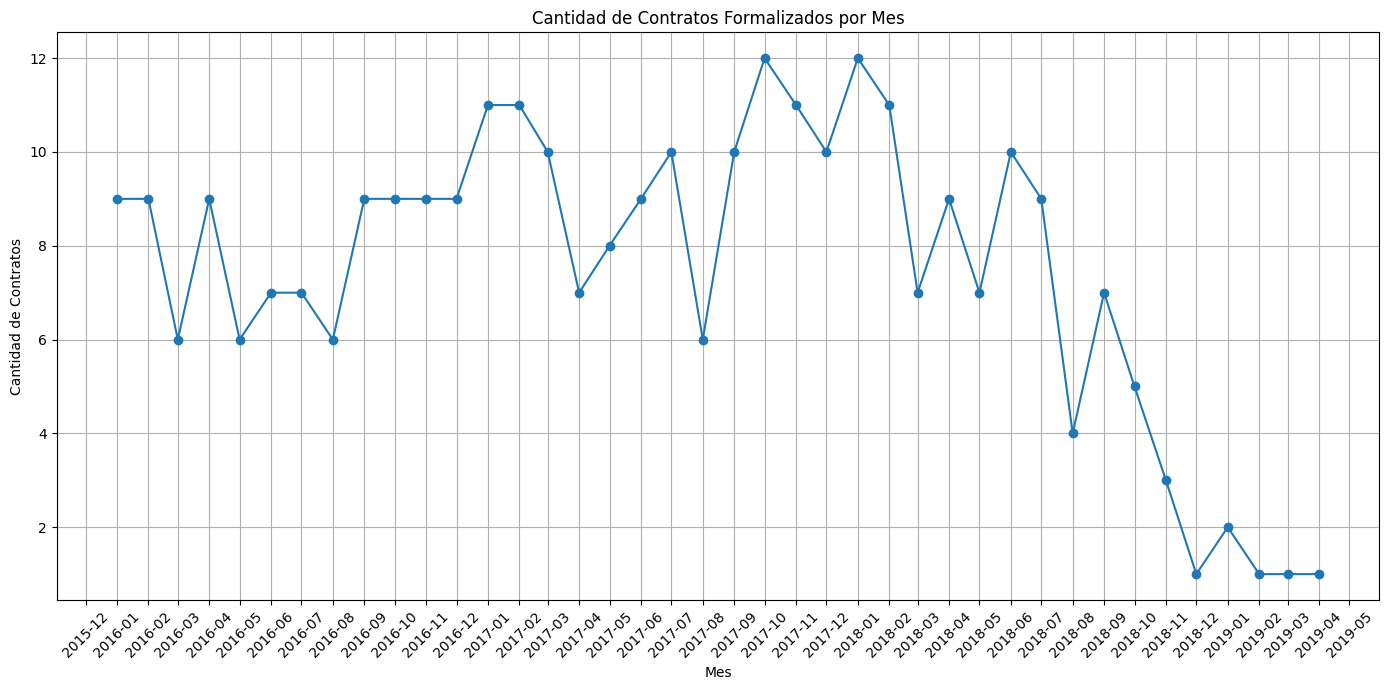

In [188]:
import matplotlib.dates as mdates
# Suponiendo que data es tu DataFrame y 'mm_yyyy' es la columna que contiene las fechas
# Convertir la columna 'mm_yyyy' a datetime con el formato correcto
data['mm_yyyy'] = pd.to_datetime(data['mm_yyyy'], format='%m-%Y')

# Agrupar los datos por mes y contar la cantidad de contratos
monthly_counts = data['mm_yyyy'].dt.to_period('M').value_counts().sort_index()

# Convertir a un formato que permita graficar
monthly_counts = monthly_counts.to_timestamp()

# Graficar la cantidad de contratos por mes
plt.figure(figsize=(14, 7))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Cantidad de Contratos Formalizados por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Contratos')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

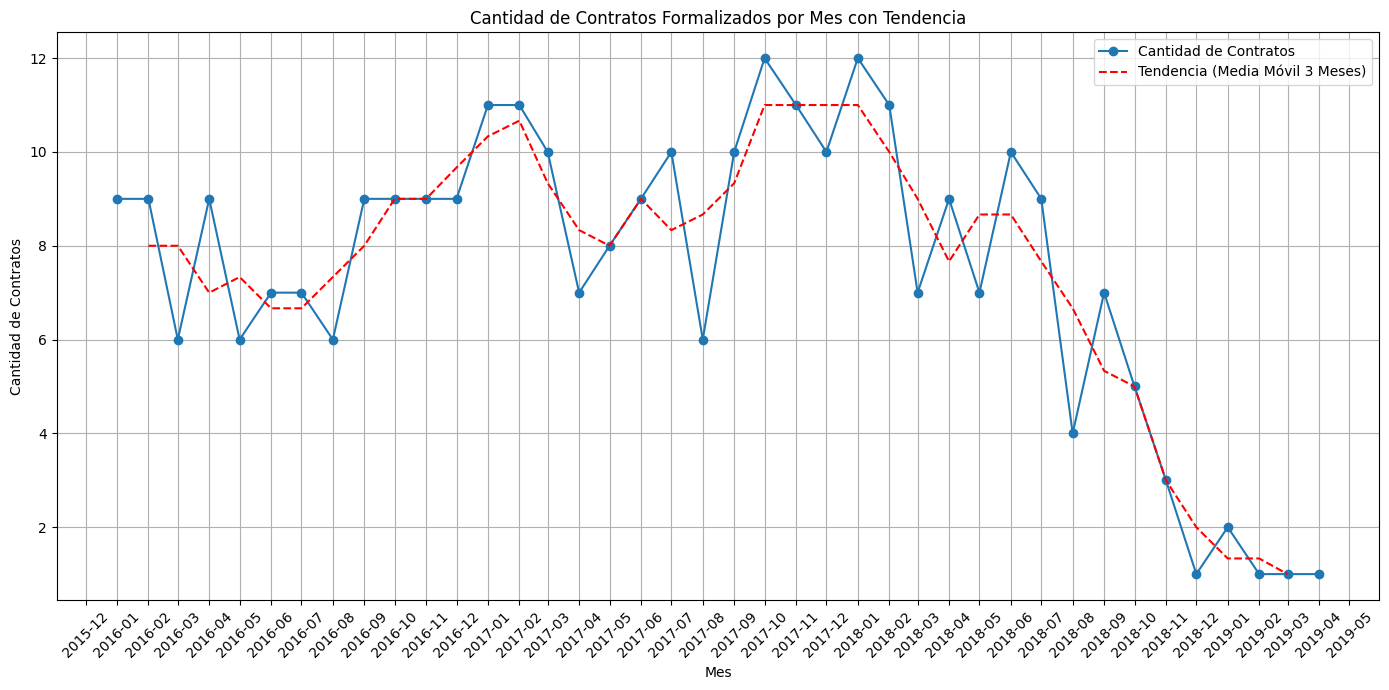

In [189]:
import matplotlib.dates as mdates
# Agregar una tendencia utilizando una media móvil de 3 meses
monthly_counts_rolling = monthly_counts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', label='Cantidad de Contratos')
plt.plot(monthly_counts_rolling.index, monthly_counts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Cantidad de Contratos Formalizados por Mes con Tendencia')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Contratos')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

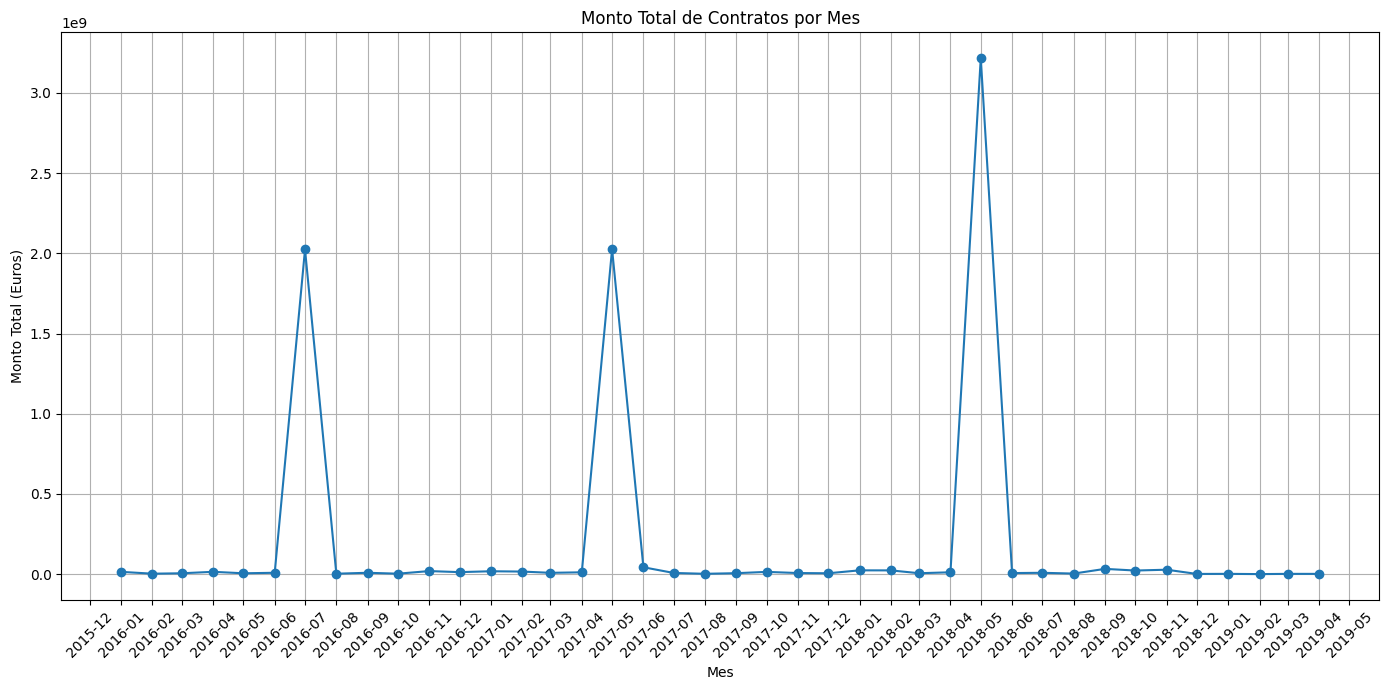

In [190]:

# Agrupar los datos por mes y sumar los montos de los contratos por mes
monthly_amounts = data.groupby(data['mm_yyyy'].dt.to_period('M'))['amount'].sum().sort_index()

# Convertir a un formato que permita graficar
monthly_amounts = monthly_amounts.to_timestamp()

# Graficar los montos de contratos por mes
plt.figure(figsize=(14, 7))
plt.plot(monthly_amounts.index, monthly_amounts.values, marker='o', linestyle='-')
plt.title('Monto Total de Contratos por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

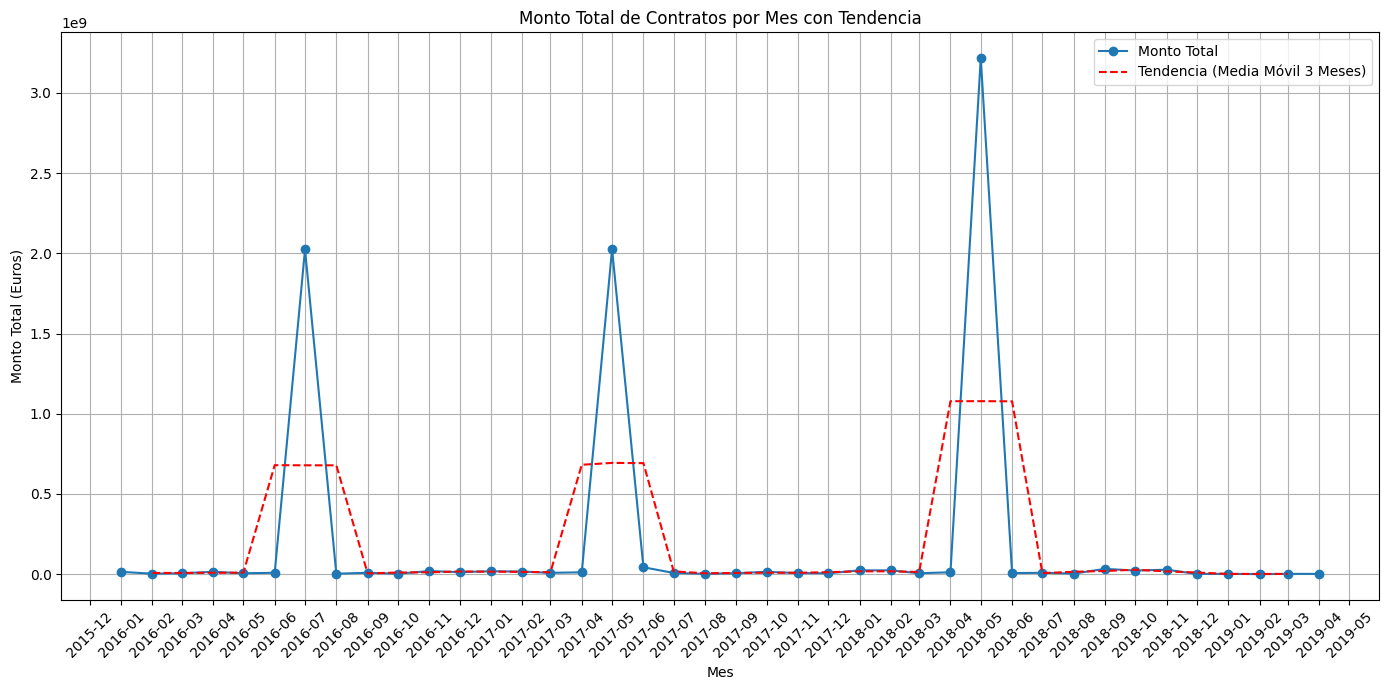

In [191]:
# Agregar una tendencia utilizando una media móvil de 3 meses
monthly_amounts_rolling = monthly_amounts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(monthly_amounts.index, monthly_amounts.values, marker='o', linestyle='-', label='Monto Total')
plt.plot(monthly_amounts_rolling.index, monthly_amounts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Monto Total de Contratos por Mes con Tendencia')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

In [192]:
# Resumen estadístico de los montos de contratos por mes
monthly_amounts.describe()

count    4.000000e+01
mean     1.916446e+08
std      6.620256e+08
min      0.000000e+00
25%      4.618677e+06
50%      8.197268e+06
75%      1.799491e+07
max      3.217228e+09
Name: amount, dtype: float64

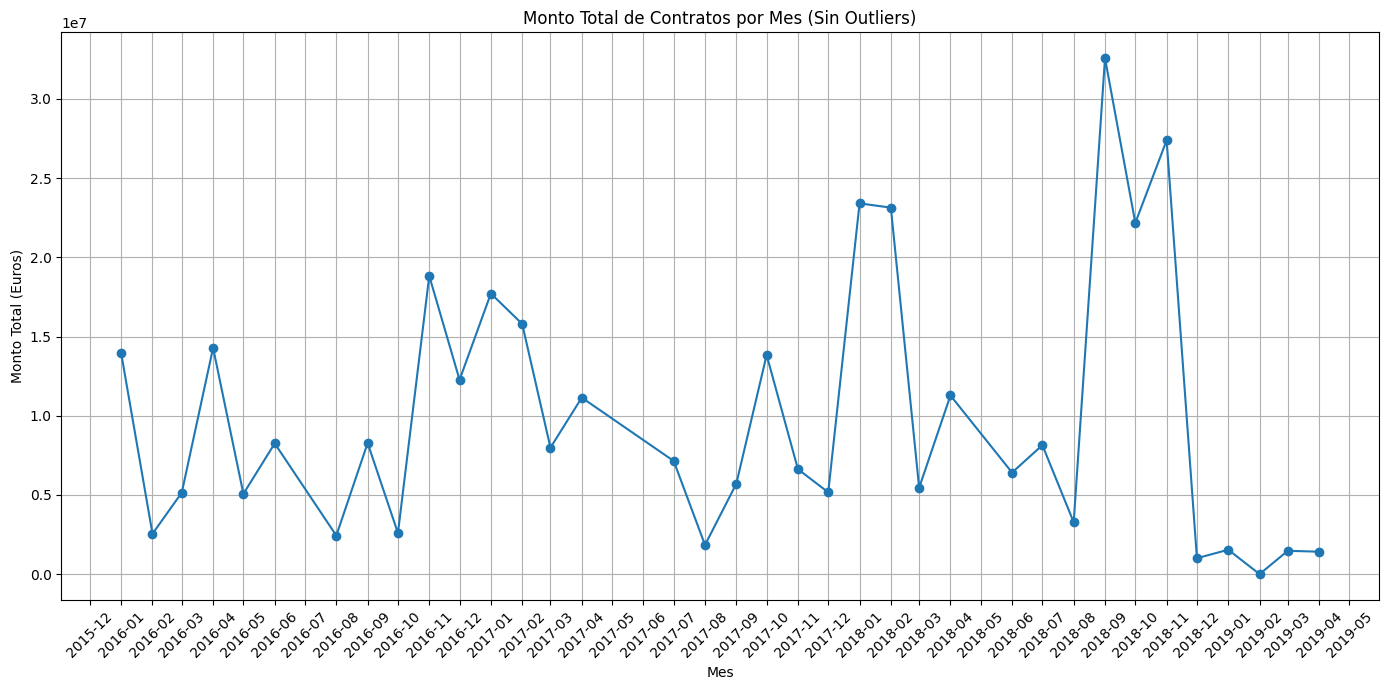

In [193]:
# Identificar y eliminar el outlier
# Calcular el percentil 99 para identificar el outlier
percentile_99_amount = np.percentile(monthly_amounts, 90)

# Filtrar los datos para excluir los valores por encima del percentil 99
filtered_monthly_amounts = monthly_amounts[monthly_amounts <= percentile_99_amount]

# Graficar los montos de contratos por mes sin el outlier
plt.figure(figsize=(14, 7))
plt.plot(filtered_monthly_amounts.index, filtered_monthly_amounts.values, marker='o', linestyle='-')
plt.title('Monto Total de Contratos por Mes (Sin Outliers)')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

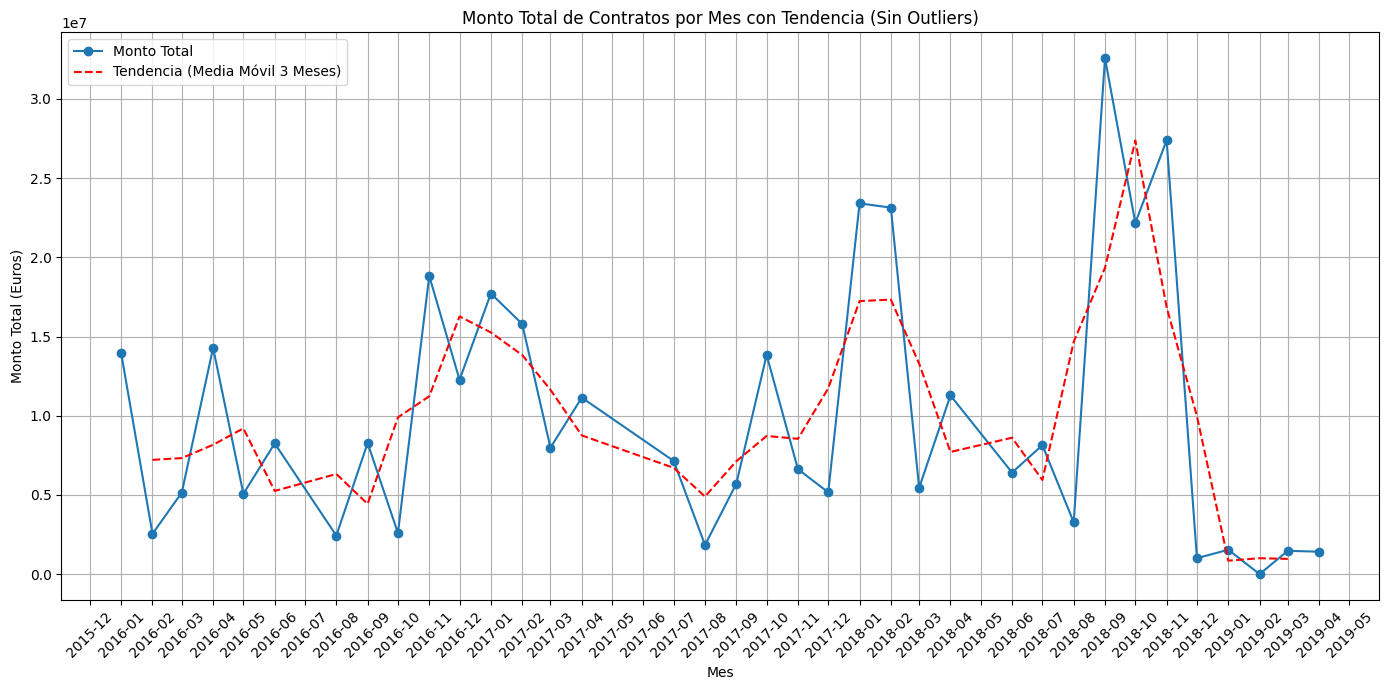

In [194]:
# Agregar una tendencia utilizando una media móvil de 3 meses
filtered_monthly_amounts_rolling = filtered_monthly_amounts.rolling(window=3, center=True).mean()

# Graficar con la media móvil
plt.figure(figsize=(14, 7))
plt.plot(filtered_monthly_amounts.index, filtered_monthly_amounts.values, marker='o', linestyle='-', label='Monto Total')
plt.plot(filtered_monthly_amounts_rolling.index, filtered_monthly_amounts_rolling.values, color='r', linestyle='--', label='Tendencia (Media Móvil 3 Meses)')
plt.title('Monto Total de Contratos por Mes con Tendencia (Sin Outliers)')
plt.xlabel('Mes')
plt.ylabel('Monto Total (Euros)')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.tight_layout()
plt.show()

In [195]:
# Resumen estadístico de los montos de contratos por mes sin outlier
filtered_monthly_amounts.describe()

count    3.600000e+01
mean     9.868282e+06
std      8.237556e+06
min      0.000000e+00
25%      3.101313e+06
50%      7.564067e+06
75%      1.403203e+07
max      3.257918e+07
Name: amount, dtype: float64

# Compare llama3 and phi3

In [196]:
data = pd.read_csv("comparison.csv")

In [197]:
# remove rows with time greater than 900
data_outliers = data[data['time'] <= 900]

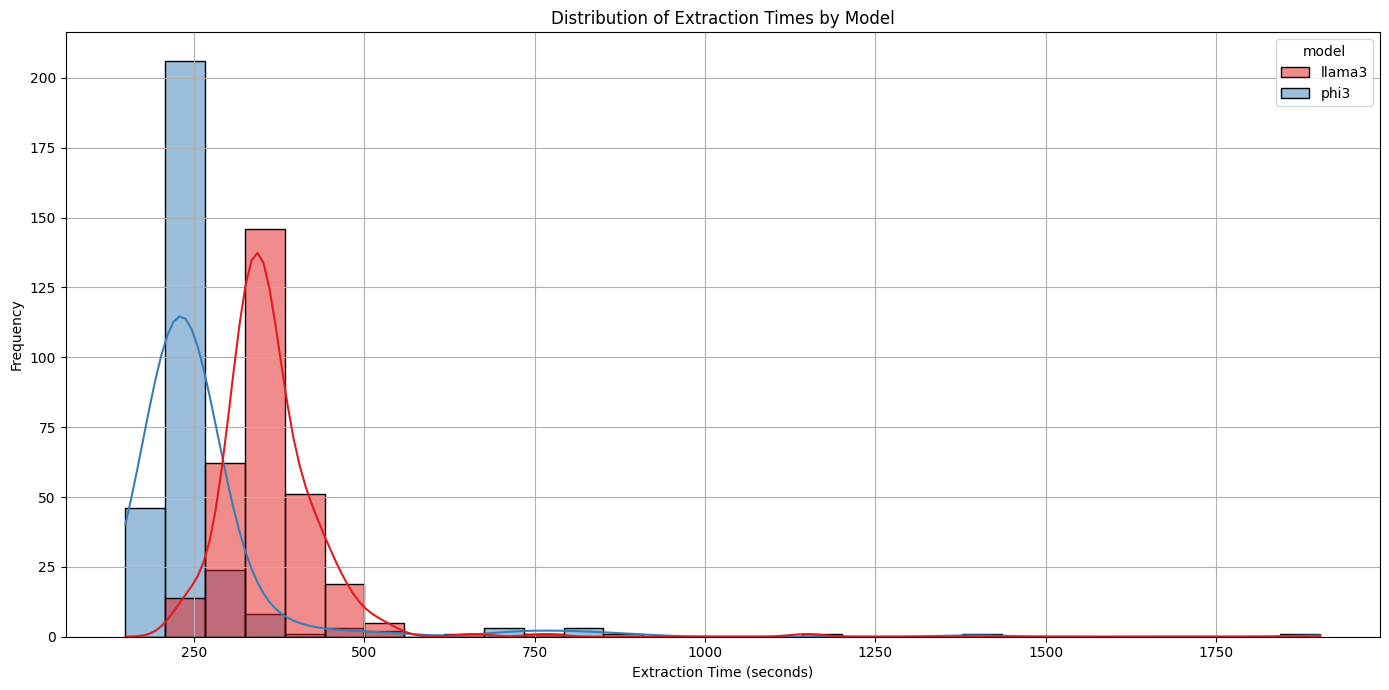

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of extraction times for both models
plt.figure(figsize=(14, 7))
sns.histplot(data=data, x='time', hue='model', kde=True, bins=30, palette='Set1')
plt.title('Distribution of Extraction Times by Model')
plt.xlabel('Extraction Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


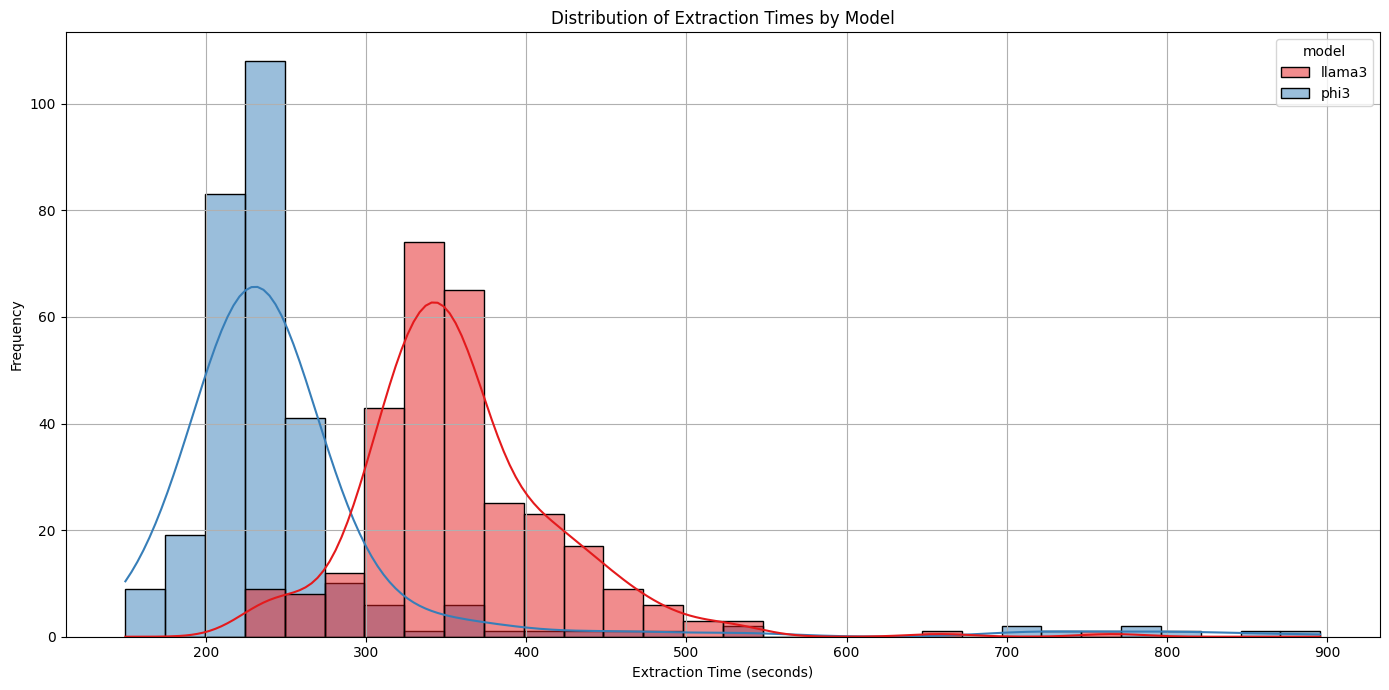

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of extraction times for both models
plt.figure(figsize=(14, 7))
sns.histplot(data=data_outliers, x='time', hue='model', kde=True, bins=30, palette='Set1')
plt.title('Distribution of Extraction Times by Model')
plt.xlabel('Extraction Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


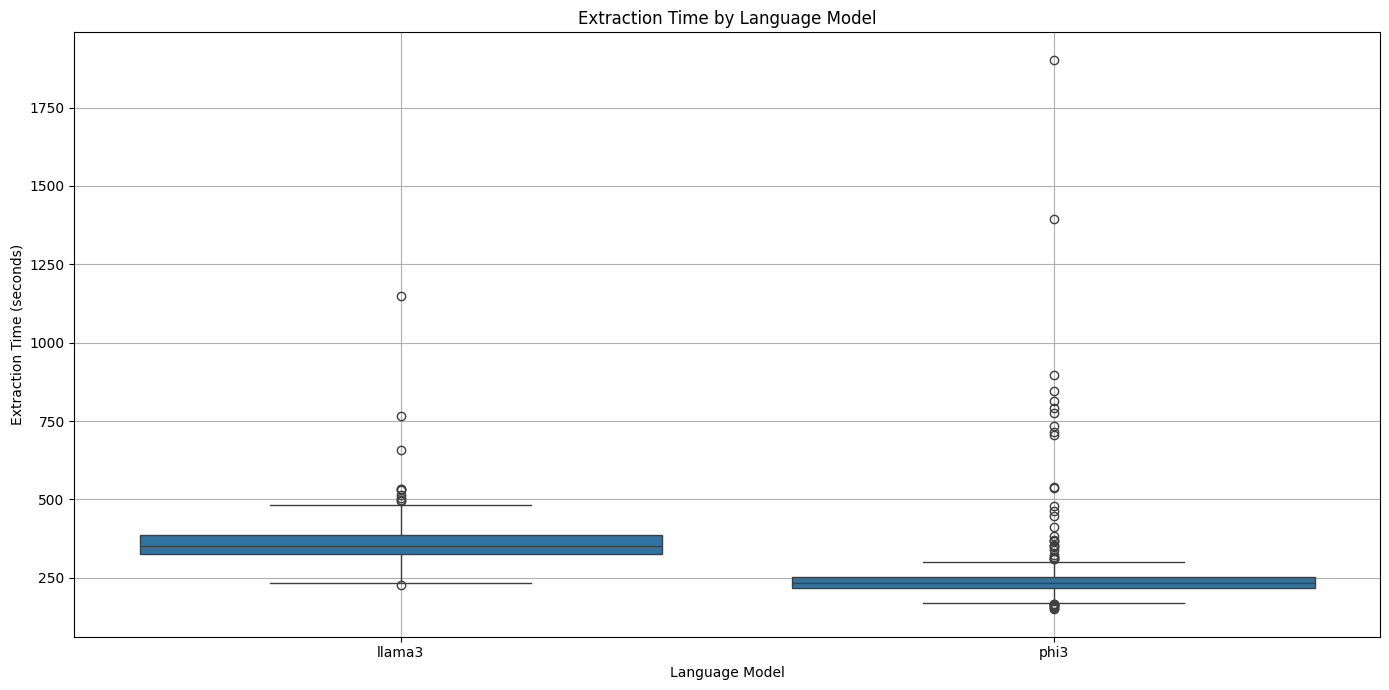

In [200]:
# Calculate the descriptive statistics of the extraction time by model
model_time_stats = data.groupby('model')['time'].describe()

# Plot the average extraction time by language model
plt.figure(figsize=(14, 7))
sns.boxplot(x='model', y='time', data=data)
plt.title('Extraction Time by Language Model')
plt.xlabel('Language Model')
plt.ylabel('Extraction Time (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()

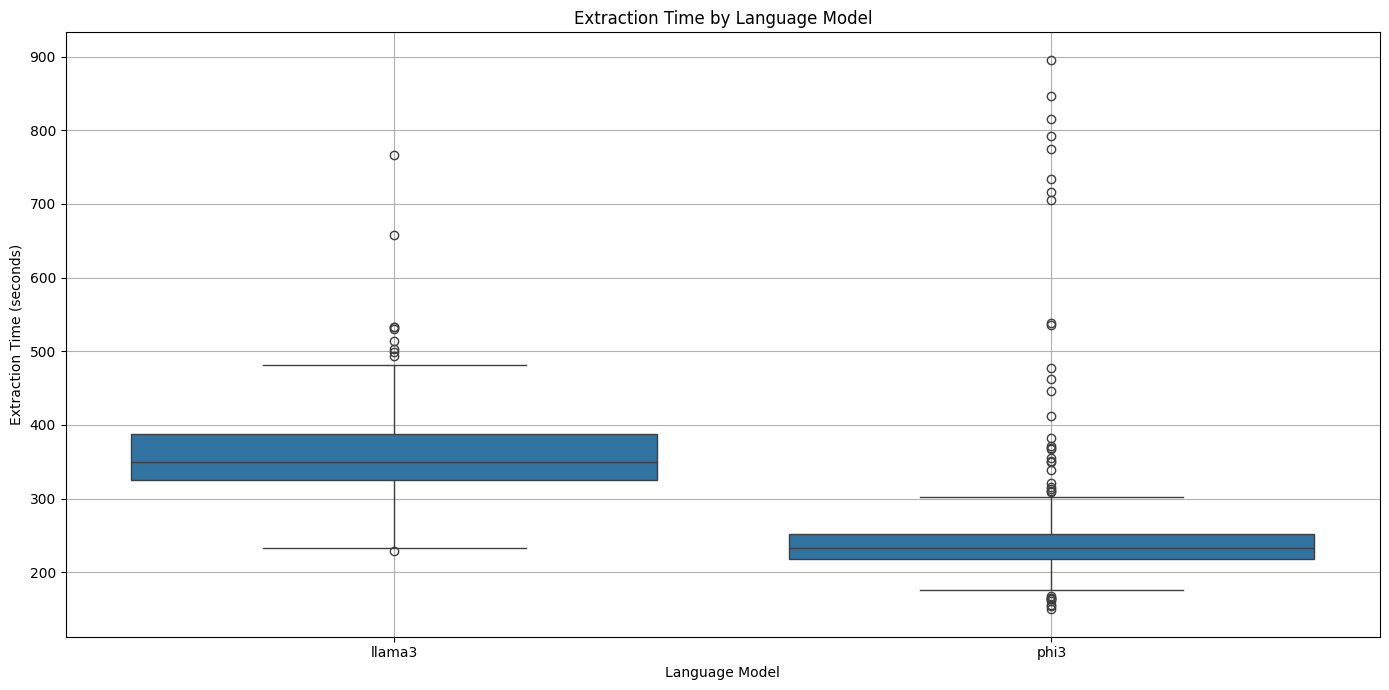

In [201]:
# Calculate the descriptive statistics of the extraction time by model
model_time_stats = data.groupby('model')['time'].describe()

# Plot the average extraction time by language model
plt.figure(figsize=(14, 7))
sns.boxplot(x='model', y='time', data=data_outliers)
plt.title('Extraction Time by Language Model')
plt.xlabel('Language Model')
plt.ylabel('Extraction Time (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()

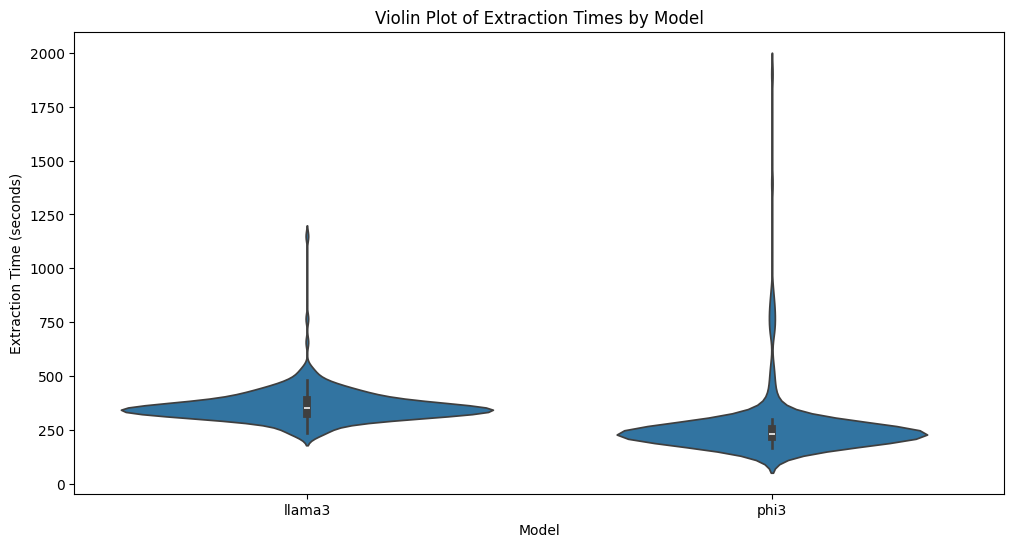

In [202]:
# Violin plot of extraction times
plt.figure(figsize=(12, 6))
sns.violinplot(x='model', y='time', data=data)
plt.title('Violin Plot of Extraction Times by Model')
plt.xlabel('Model')
plt.ylabel('Extraction Time (seconds)')
plt.show()

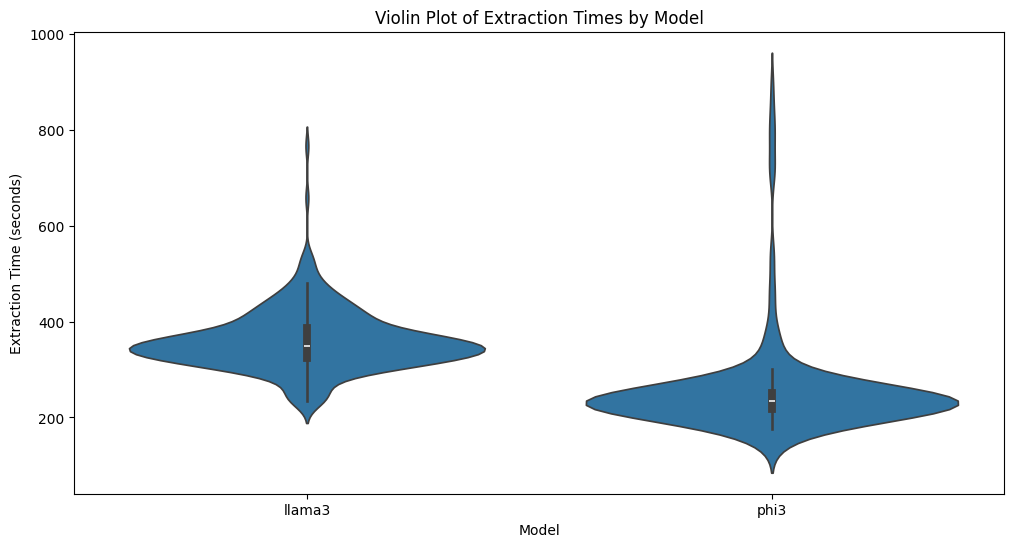

In [203]:
# Violin plot of extraction times
plt.figure(figsize=(12, 6))
sns.violinplot(x='model', y='time', data=data_outliers)
plt.title('Violin Plot of Extraction Times by Model')
plt.xlabel('Model')
plt.ylabel('Extraction Time (seconds)')
plt.show()

In [204]:
# Display the time statistics by model
model_time_stats

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
llama3,300.0,361.843767,77.559021,228.47,324.740,349.880,387.9850,1149.78
phi3,300.0,263.434667,153.658285,149.60,218.185,233.415,252.0775,1902.61


In [205]:
# Calculate dispersion measures for extraction times

# Separate data by model
llama3_times = data[data['model'] == 'llama3']['time']
phi3_times = data[data['model'] == 'phi3']['time']

# Range
range_llama3 = llama3_times.max() - llama3_times.min()
range_phi3 = phi3_times.max() - phi3_times.min()

# Variance
variance_llama3 = llama3_times.var()
variance_phi3 = phi3_times.var()

# Standard Deviation
std_dev_llama3 = llama3_times.std()
std_dev_phi3 = phi3_times.std()

# Interquartile Range (IQR)
iqr_llama3 = llama3_times.quantile(0.75) - llama3_times.quantile(0.25)
iqr_phi3 = phi3_times.quantile(0.75) - phi3_times.quantile(0.25)

# Create a summary dataframe
dispersion_measures = pd.DataFrame({
    'Measure': ['Range', 'Variance', 'Standard Deviation', 'IQR'],
    'Llama3': [range_llama3, variance_llama3, std_dev_llama3, iqr_llama3],
    'Phi-3': [range_phi3, variance_phi3, std_dev_phi3, iqr_phi3]
})

dispersion_measures

,Measure,Llama3,Phi-3
0,Range,921.310000,1753.010000
1,Variance,6015.401744,23610.868502
2,Standard Deviation,77.559021,153.658285
3,IQR,63.245000,33.892500


**Interpretation**
- Range: Phi-3 shows a wider range in extraction times, indicating greater variability in extreme times.
- Variance and Standard Deviation: Phi-3 also has significantly higher variance and standard deviation compared to Llama3, confirming that Phi-3's extraction times are more dispersed.
- IQR: Interestingly, the IQR of Llama3 is higher than that of Phi-3, suggesting that the dispersion in the central 50% of the data is greater for Llama3.

In [206]:
from scipy.stats import shapiro, normaltest, anderson

# Shapiro-Wilk test for normal distribution
shapiro_llama3 = shapiro(data[data['model'] == 'llama3']['time'])
shapiro_phi3 = shapiro(data[data['model'] == 'phi3']['time'])

# Display test results
shapiro_results = {
    'llama3': {'Statistic': shapiro_llama3[0], 'p-value': shapiro_llama3[1]},
    'phi3': {'Statistic': shapiro_phi3[0], 'p-value': shapiro_phi3[1]}
}

shapiro_results


{'llama3': {'Statistic': np.float64(0.7307294123536073),
  'p-value': np.float64(9.952835875786658e-22)},
 'phi3': {'Statistic': np.float64(0.3750818608150688),
  'p-value': np.float64(8.1470370988751e-31)}}

No siguen una normal ninguno de los dos

In [207]:
from scipy.stats import ks_2samp

# Perform the Kolmogorov-Smirnov test to compare the time distributions between the two models
ks_test_result = ks_2samp(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'])

# Display test results
ks_test_result


KstestResult(statistic=np.float64(0.8233333333333334), pvalue=np.float64(5.66990990078276e-103), statistic_location=np.float64(283.41), statistic_sign=np.int8(-1))

pvalor p-valor: $4.06*10^-54$ La prueba de Kolmogorov-Smirnov sugiere que los tiempos de extracción para los modelos llama3 y phi3 no siguen la misma distribución.

In [208]:
from scipy.stats import mannwhitneyu

# Perform the Wilcoxon-Mann-Whitney test to compare the medians of extraction times between the two models
wilcoxon_result = mannwhitneyu(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'], alternative='two-sided')

# Display test results
wilcoxon_result


MannwhitneyuResult(statistic=np.float64(82471.0), pvalue=np.float64(1.034573050728277e-69))

p-valor: $2.41*10^-36$ La prueba de Wilcoxon-Mann-Whitney sugiere que las medianas de los tiempos de extracción para los modelos llama3 y phi3 son significativamente diferentes

In [209]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis test to compare the medians of extraction times between the two models
kruskal_result = kruskal(data[data['model'] == 'llama3']['time'], data[data['model'] == 'phi3']['time'])

# Display test results
kruskal_result


KruskalResult(statistic=np.float64(311.4977599595762), pvalue=np.float64(1.0302681217244865e-69))

La prueba de Kruskal-Wallis sugiere que las medianas de los tiempos de extracción para los modelos llama3 y phi3 son significativamente diferentes

In [210]:
# How faster is phi3 on average
phi3_mean = data[data['model'] == 'phi3']['time'].mean()
llama3_mean = data[data['model'] == 'llama3']['time'].mean()

speedup = (llama3_mean - phi3_mean) / llama3_mean * 100
print(f"phi3 is {speedup:.2f}% faster on average compared to llama3")

phi3 is 27.20% faster on average compared to llama3


In [211]:
# Count the number of None values for each model and column
none_counts = data.isna().groupby(data['model']).sum()

# Display the result
none_counts

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
model,,,,,,,,,,,
llama3,0,0,61,26,26,13,1,31,31,0,0
phi3,0,0,2,0,0,3,0,32,32,0,0


In [212]:
# Count number of rows with None values for each model
none_counts = data.isna().groupby(data['model']).sum()
# Display the result
none_counts

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
model,,,,,,,,,,,
llama3,0,0,61,26,26,13,1,31,31,0,0
phi3,0,0,2,0,0,3,0,32,32,0,0


In [214]:
data['model'].value_counts()

model
llama3    300
phi3      300
Name: count, dtype: int64

In [215]:
# Calcular el total de filas por modelo
total_rows_per_model = data['model'].value_counts()

# Calcular el porcentaje de 'None' por cada modelo y columna
none_percentage = (none_counts.div(total_rows_per_model, axis=0)) * 100

# Redondear a dos decimales
none_percentage = none_percentage.round(2)

# Mostrar el resultado
none_percentage

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time
model,,,,,,,,,,,
llama3,0.0,0.0,20.33,8.67,8.67,4.33,0.33,10.33,10.33,0.0,0.0
phi3,0.0,0.0,0.67,0.00,0.00,1.00,0.00,10.67,10.67,0.0,0.0


In [216]:
import scipy.stats as stats

# Calculate the amount of None values per model
none_counts = data.isna().groupby(data['model']).sum()

# Add a column with the total None per model
none_counts['total_None'] = none_counts.sum(axis=1)

# Extract the total None counts for each model
llama3_none_count = none_counts.loc['llama3', 'total_None']
phi3_none_count = none_counts.loc['phi3', 'total_None']

# Create the contingency table with calculated values
contingency_table = pd.DataFrame({
    'None': [llama3_none_count, phi3_none_count],  # Total 'None' values for 'llama3' and 'phi3'
    'No None': [data['model'].value_counts()['llama3'] - llama3_none_count, 
                data['model'].value_counts()['phi3'] - phi3_none_count]  # Total non-None values for 'llama3' and 'phi3'
}, index=['llama3', 'phi3'])

# Print the contingency table to verify
print(contingency_table)

# Realizar la prueba chi-cuadrado
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

# Resultados
print(chi2_stat)
print(f"pvalue is: {p_val}")
print(f"dof is: {dof}")
print(contingency_table)
print(ex)

        None  No None
llama3   189      111
phi3      69      231
96.29402964776281
pvalue is: 9.902821150375335e-23
dof is: 1
        None  No None
llama3   189      111
phi3      69      231
[[129. 171.]
 [129. 171.]]


The extremely low p-value signifies that the differences observed in the number of "None" values between llama3 and phi3 are not due to random variation, but rather indicate a real discrepancy between the models. Specifically, llama3 produces a significantly higher proportion of "None" values compared to phi3, suggesting a possible performance issue or difference in how these models handle the extraction task.

In [220]:
def add_none_count_column(df):
    """
    Adds a new column to the DataFrame that contains the number of None values in each row.

    Args:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with an additional column for the count of None values in each row.
    """
    df['None_Count'] = df.isnull().sum(axis=1)
    return df

# Add a new column for the count of None values in each row
data_with_none_count = add_none_count_column(data)
data_with_none_count.head()

,pdf,mm_yyyy,company,amount,currency,adjudicadora,tipo,tramitacion,procedimiento,model,time,None_Count
0,BOE-B-2017-3514.pdf,01-2017,Alavés Montajes y Realización S.L.,1016400.00,euros,Agència Valenciana del Turisme,Contrato Mixto,Urgente,Negociado sin publicidad,llama3,404.64,0
1,BOE-B-2017-240.pdf,01-2017,International Business Machines S.A. (I.B.M.),3921166.68,euros,Diputación Foral de Álava,Contrato de suministro,Anticipada,Negociado sin publicidad por razones de exclus...,llama3,411.99,0
2,BOE-B-2017-2859.pdf,01-2017,Integra Mantenimiento Gestión y Servicios Inte...,440618.45,euros,Ayuntamiento de Madrid. Área de Gobierno de Eq...,Servicios,Ordinaria,Abierto,llama3,352.15,0
3,BOE-B-2017-470.pdf,01-2017,Teknoservice S.L.,1011150.00,euros,Consejería de Educación y Universidades del Go...,Suministro,Ordinaria,Abierto,llama3,368.93,0
4,BOE-B-2017-4174.pdf,01-2017,Econocom Osiatis S.A.,360000.00,euros,Ayuntamiento de Vitoria-Gasteiz,Servicio,Normal,Abierto,llama3,414.85,0


In [219]:
# Extract the total None counts for each model
llama3_none_count = none_counts.loc['llama3', 'total_None']
phi3_none_count = none_counts.loc['phi3', 'total_None']

print(f"Total None counts for Llama3 model: {llama3_none_count}")
print(f"Total None counts for Phi3 model: {phi3_none_count}")

Total None counts for Llama3 model: 189
Total None counts for Phi3 model: 69
